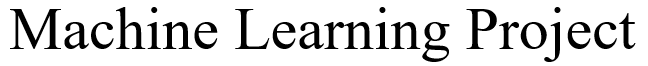

=========================================================================================================================

* <p style="color:#053bfc;">About Project :-</p> 

     Lending Market Club is a market place for personal loan & matches borrowers who are seeking a loan with investor            looking to lend money & make a return.
     
     Each borrower fills out a application form by providing past financial details, reason of the loan etc.
     
     Lending club evaluates each borrower's credit score using the historical data and then assigns the interest rate to        the borrower.
     
     Approved loans are then listed on the lenders club website where investors can browse on recent approved loans, the        borrowers credit score the purpose for the loan and information related to their personal status.
     
     Once an investor decides to fund a particular loan, then the borrower makes monthly payment back to the lending club.      Lending club then re- distrubutes these payments to the investors. This means that the investor don't have to wait          until the full amount is paid off to see their returns.
     
     If a loan is paid fully paid off on time then the investor makes a return which correspond to the interest rate the        borrower had ti pay in addition to the requested amount.
     
     Many users don't pay their loan on time, here we will be making a model using machine learning to help the lending          club understand whether the user will be able to pay or not on using the historical data.

=========================================================================================================================




### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
d1 = pd.read_csv(r'C:\Users\Sabae\Downloads\Loan.csv')                                                # Original Data.
d1

,Sr.No,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,...,last_fico_range_low,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
0,0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,Other,...,740,1,INDIVIDUAL,0,0,0,36,10.65,10,83.7
1,1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,...,0,1,INDIVIDUAL,0,0,0,60,15.27,0,9.4
2,2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,Other,...,715,1,INDIVIDUAL,0,0,0,36,15.96,10,98.5
3,3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,...,600,1,INDIVIDUAL,0,0,0,36,13.49,10,21.0
4,4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,...,690,1,INDIVIDUAL,0,0,0,60,12.69,1,53.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42415,42415,91126,91067,5350,5350,625.0,180.57,D,D5,Clinton Shop Rite of Hunterdon County,...,700,1,INDIVIDUAL,0,0,0,36,13.12,1,0.0
42416,42416,90106,90090,10000,10000,350.0,345.18,E,E5,GA-PCOM,...,0,1,INDIVIDUAL,0,0,0,36,14.70,1,85.0
42417,42417,89258,80039,2000,2000,1275.0,61.87,A,A1,Tzigane Inc,...,805,1,INDIVIDUAL,0,0,0,36,7.12,7,2.2
42418,42418,88637,88629,6000,6000,650.0,195.28,C,C2,Yale University,...,765,1,INDIVIDUAL,0,0,0,36,10.59,0,66.0


In [3]:
df = pd.read_csv(r'C:/Users/Sabae/Downloads/Loan_Data.csv')                             # Creating a Copy of Original Data.
df.head()

,Sr.No,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,...,last_fico_range_low,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
0,0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,Other,...,740,1,INDIVIDUAL,0,0,0,36,10.65,10,83.7
1,1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,...,0,1,INDIVIDUAL,0,0,0,60,15.27,0,9.4
2,2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,Other,...,715,1,INDIVIDUAL,0,0,0,36,15.96,10,98.5
3,3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,...,600,1,INDIVIDUAL,0,0,0,36,13.49,10,21.0
4,4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,...,690,1,INDIVIDUAL,0,0,0,60,12.69,1,53.9


In [4]:
df.shape                                                                                         # Checking Rows & Columns.

(42420, 53)

In [5]:
df.isnull().sum()                                                                                   # Checking Null Values.

Sr.No                      0
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

In [6]:
df.info()                                                                                                 # Checking Dtypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42420 entries, 0 to 42419
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr.No                    42420 non-null  int64  
 1   id                       42420 non-null  int64  
 2   member_id                42420 non-null  int64  
 3   loan_amnt                42420 non-null  int64  
 4   funded_amnt              42420 non-null  int64  
 5   funded_amnt_inv          42420 non-null  float64
 6   installment              42420 non-null  float64
 7   grade                    42420 non-null  object 
 8   sub_grade                42420 non-null  object 
 9   emp_title                42420 non-null  object 
 10  home_ownership           42420 non-null  object 
 11  annual_inc               42420 non-null  float64
 12  verification_status      42420 non-null  object 
 13  issue_d                  42420 non-null  object 
 14  loan_status           

=========================================================================================================================

### Finding Target Featuers :-

In [7]:
df[['pymnt_plan']].value_counts()

pymnt_plan
n             42419
y                 1
dtype: int64

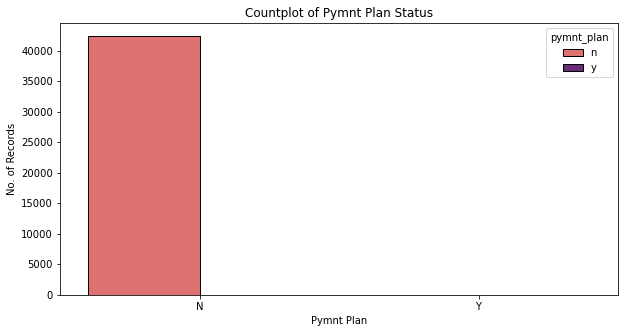

In [8]:
# Countplot of Pymnt Plan Status.

plt.figure(figsize=(10,5))
sns.countplot(x=df.pymnt_plan, data=df,edgecolor='black',hue='pymnt_plan',palette='magma_r')
plt.title('Countplot of Pymnt Plan Status')
plt.xticks(range(2), ['N', 'Y'])
plt.xlabel('Pymnt Plan')
plt.ylabel('No. of Records')
plt.show()

In [9]:
df[['delinq_amnt']].value_counts()

delinq_amnt
0              42418
27                 1
6053               1
dtype: int64

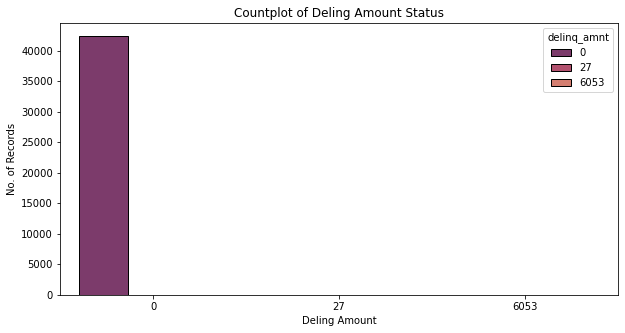

In [10]:
# Countplot of Deling Amount Status.

plt.figure(figsize=(10,5))
sns.countplot(x=df.delinq_amnt, data=df,edgecolor='black',hue='delinq_amnt',palette='flare_r')
plt.title('Countplot of Deling Amount Status')
plt.xlabel('Deling Amount')
plt.ylabel('No. of Records')
plt.show()

In [11]:
df[['acc_now_delinq']].value_counts()

acc_now_delinq
0                 42416
1                     4
dtype: int64

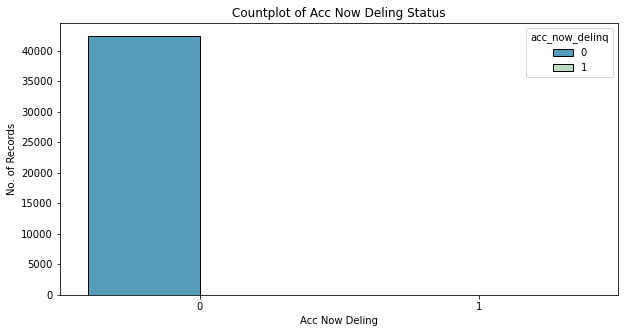

In [12]:
# Countplot of Acc Now Deling Status.

plt.figure(figsize=(10,5))
sns.countplot(x=df.acc_now_delinq, data=df,edgecolor='black',hue='acc_now_delinq',palette='GnBu_r')
plt.title('Countplot of Acc Now Deling Status')
plt.xlabel('Acc Now Deling')
plt.ylabel('No. of Records')
plt.show()

In [13]:
df[['grade']].value_counts()

grade
B        12362
A        10165
C         8707
D         5997
E         3381
F         1298
G          510
dtype: int64

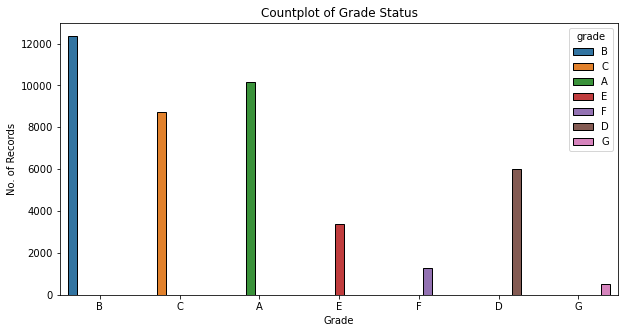

In [14]:
# Countplot of Grade Status.

plt.figure(figsize=(10,5))
sns.countplot(x=df.grade, data=df,edgecolor='black',hue='grade')
plt.title('Countplot of Grade Status')
plt.xlabel('Grade')
plt.ylabel('No. of Records')
plt.show()

In [15]:
df[['verification_status']].value_counts()

verification_status
Not Verified           18682
Verified               13447
Source Verified        10291
dtype: int64

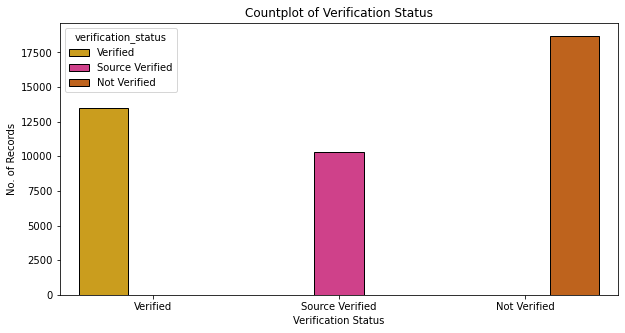

In [16]:
# Countplot of Verification Status.

plt.figure(figsize=(10,5))
sns.countplot(x=df.verification_status, data=df,edgecolor='black',hue='verification_status',palette='Dark2_r')
plt.title('Countplot of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('No. of Records')
plt.show()

In [17]:
df[['pub_rec']].value_counts()

pub_rec
0          40052
1           2290
2             64
3             11
4              2
5              1
dtype: int64

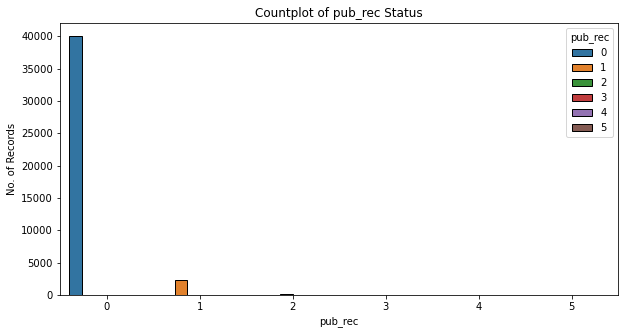

In [18]:
# Countplot of pub_rec Status.

plt.figure(figsize=(10,5))
sns.countplot(x=df.pub_rec, data=df,edgecolor='black',hue='pub_rec')
plt.title('Countplot of pub_rec Status')
plt.xlabel('pub_rec')
plt.ylabel('No. of Records')
plt.show()

In [19]:
df['term_months'].value_counts()

36    31437
60    10983
Name: term_months, dtype: int64

Text(0, 0.5, 'Loan Amount')

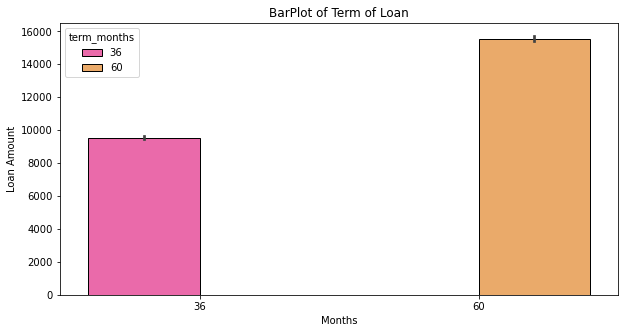

In [20]:
# BarPlot of Term of Loan.

plt.figure(figsize=(10,5))
sns.barplot("term_months", "loan_amnt", data=df, palette='spring',edgecolor='black',hue='term_months')
plt.title("BarPlot of Term of Loan")
plt.xlabel("Months")
plt.ylabel("Loan Amount")

In [21]:
df['int_rate_%'].value_counts()

10.99    970
11.49    833
13.49    830
7.51     786
7.88     742
        ... 
17.46      1
21.48      1
24.40      1
16.83      1
16.20      1
Name: int_rate_%, Length: 394, dtype: int64

Text(0.5, 1.0, 'Displot of Int Rate Distribuition')

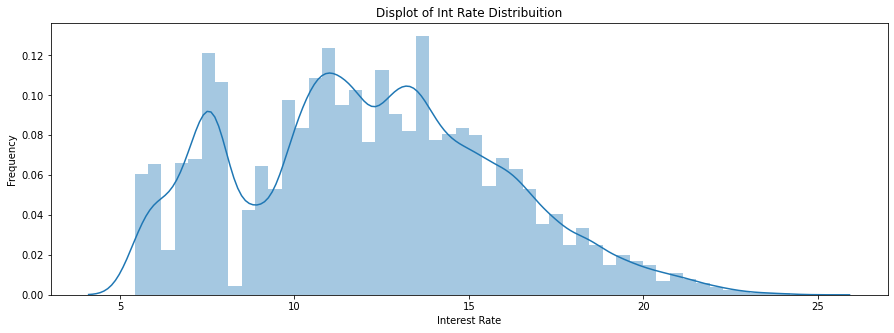

In [22]:
# Displot of Int Rate Distribuition.

plt.figure(figsize=(15,5))
ROI = sns.distplot(df["int_rate_%"])
ROI.set_xlabel("Interest Rate")
ROI.set_ylabel("Frequency")
ROI.set_title("Displot of Int Rate Distribuition")

In [23]:
df['emp_length_year'].value_counts()

10    9356
0     6139
2     4734
3     4355
4     3641
1     3578
5     3448
6     2371
7     1874
8     1588
9     1336
Name: emp_length_year, dtype: int64

Text(0, 0.5, 'Years worked')

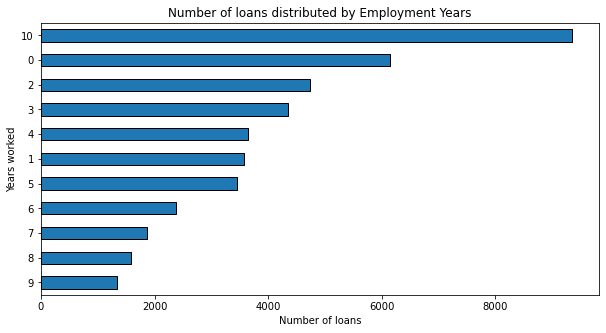

In [24]:
# Number of loans distributed by Employment Years.

df['emp_length_year'].value_counts().sort_values().plot(kind='barh',figsize=(10,5),edgecolor='black')
plt.title('Number of loans distributed by Employment Years')
plt.xlabel('Number of loans')
plt.ylabel('Years worked')

In [25]:
df['purpose'].value_counts()

debt_consolidation    19742
credit_card            5474
other                  4380
home_improvement       3194
major_purchase         2306
small_business         1983
car                    1615
wedding                 998
medical                 752
moving                  628
house                   424
educational             419
vacation                400
renewable_energy        105
Name: purpose, dtype: int64

Text(0, 0.5, 'Loan Amount')

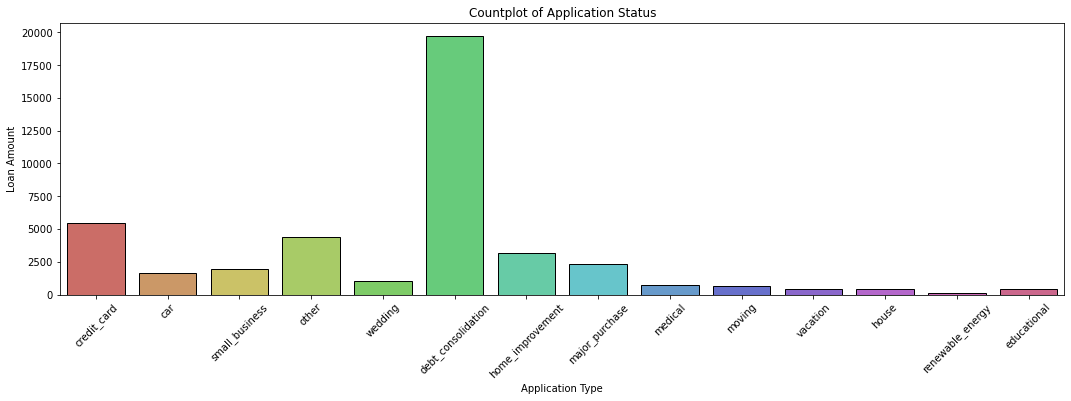

In [26]:
# Countplot of Application Status.

plt.figure(figsize = (18,5))
App_Type = sns.countplot(x="purpose",data=df,palette='hls',edgecolor='black')
App_Type.set_xticklabels(App_Type.get_xticklabels(),rotation=45)
App_Type.set_title("Countplot of Application Status")
App_Type.set_xlabel("Application Type")
App_Type.set_ylabel("Loan Amount")

* **Fico Score** :-

  FICO Stands for the Fair Isaac Corporation. FICO Was a Pioneer in Developing a Method for Calculating Credit Scores 
  Based on Information Collected by Credit Reporting Agencies.
  
  FICO Creates Different Types of Consumer Credit Scores. There are "Base" FICO Scores that the Company Makes 
  for Lenders in Multiple Industries to use, as well as Industry-Specific Credit Scores for Credit Card Issuers and 
  Auto Lenders.
    
  <img src="https://www.credello.com/wp-content/uploads/2020/07/Fico-Score.jpg" width="400px" height="400px">
  
  The Base FICO Scores Range From 300 to 850, and FICO Defines the "Good" Range as 670 to 739. FICO's Industry-Specific 
  Credit Scores Have a Different Range 250 to 900. However, the Middle Categories have the Same Groupings and a "Good" 
  Industry-Specific FICO Score is Still 670 to 739.

In [27]:
d1[['loan_status']].value_counts()

loan_status                                        
Fully Paid                                             33585
Charged Off                                             5581
Does not meet the credit policy. Status:Fully Paid      1961
Does not meet the credit policy. Status:Charged Off      746
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
dtype: int64

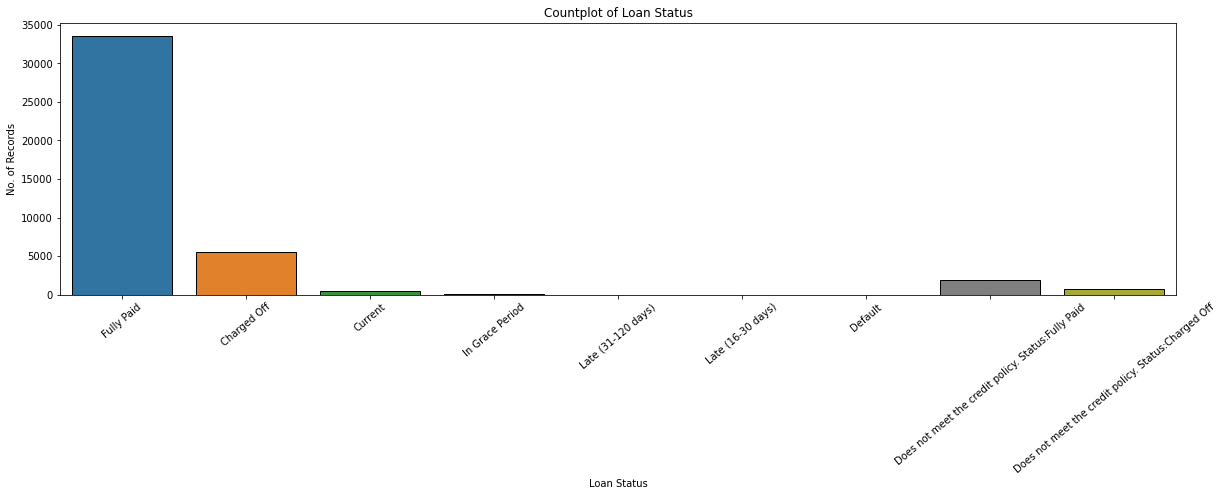

In [28]:
# Countplot of Loan Status.

plt.figure(figsize=(20,5))
plt.xticks(rotation=40)
sns.countplot(x=d1.loan_status, data=d1,edgecolor='black')
plt.title('Countplot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('No. of Records')
plt.show()

* <p style="color:#053bfc;">Note :-</p> 

  FICO Score Indicates That a Score Between 300 to 580 is Considered to be "Bad", While a Score Between 669 to 800 is 
  Considered to be "Very Good".\
  Therefore, I Decide to Divide Each Value of Loan Status Column into Two part.\
  So Here are Step To Clean Loan Status Column:-
  
  IF Fico Score <= 579 :
        Print ("Charged OFF")
  ELSE :
        Print ("Fully Paid")

In [29]:
df[['loan_status']].value_counts()

loan_status
Fully Paid     34011
Charged Off     8409
dtype: int64

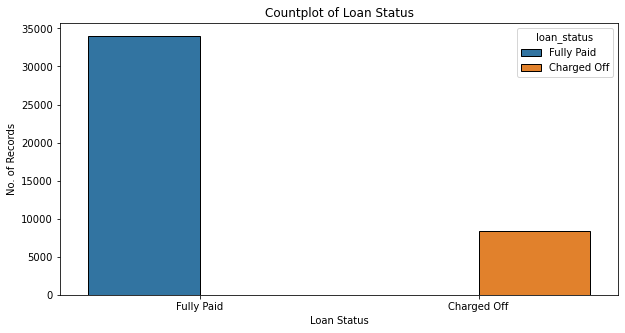

In [30]:
# Countplot of Loan Status.

plt.figure(figsize=(10,5))
# plt.xticks(rotation=40)
sns.countplot(x=df.loan_status, data=df,edgecolor='black',hue='loan_status')
plt.title('Countplot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('No. of Records')
plt.show()

=========================================================================================================================

### Labeling The Features :-

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [32]:
cols = ['grade','sub_grade','home_ownership','verification_status','pymnt_plan','purpose','initial_list_status',
       'application_type','issue_d','last_pymnt_d','last_credit_pull_d']

In [33]:
# Using For Loop Converting All Text Column into Numeric.

for i in cols:
    le= LabelEncoder()
    le.fit(list(df[i].values))
    df[i]= le.transform(list(df[i].values))

In [34]:
df['loan_status'] = df[['loan_status']].apply(le.fit_transform)
df['loan_status'].value_counts()

1    34011
0     8409
Name: loan_status, dtype: int64

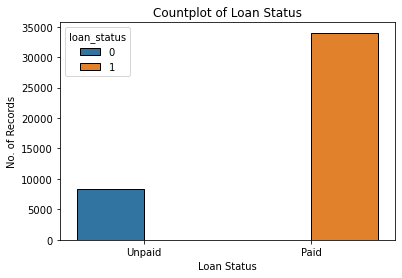

In [35]:
sns.countplot(x=df.loan_status, data=df,edgecolor='black',hue='loan_status')
plt.title('Countplot of Loan Status')
plt.xticks(range(2), ['Unpaid', 'Paid'])
plt.xlabel('Loan Status')
plt.ylabel('No. of Records')
plt.show()

* <p style="color:#053bfc;">Note :-</p> 

     After Analyzing The Data, It Conclused That We Can Use Loan Status Column as Targe Column.\
     Because in the Loan Status Column We Can Clearly Shown That The Status Of the Loan : Fully Paid , Charged Off & Others      Values.\
     So We are Considering Categories from Loan Status where 0 = Unpaid ,1 = Paid and For Other\
     We Can Merge With This 2 Only.

========================================================================================================================= 

### Finding The Best Features :-

In [36]:
# Finding The Best Features Using Co-relation.

correlation_m = df.corr()
correlation_m["loan_status"].sort_values(ascending=False)

loan_status                1.000000
last_fico_range_high       0.671930
last_fico_range_low        0.602832
total_rec_prncp            0.324582
total_pymnt_inv            0.242452
total_pymnt                0.238836
last_pymnt_amnt            0.216245
fico_range_high            0.179707
fico_range_low             0.179707
annual_inc                 0.051393
total_acc                  0.047831
funded_amnt_inv            0.034036
member_id                  0.030674
id                         0.026319
total_rec_int              0.025877
out_prncp                  0.020625
out_prncp_inv              0.020611
open_acc                   0.018531
installment                0.014707
last_pymnt_d               0.010451
funded_amnt                0.003474
pymnt_plan                 0.002414
delinq_amnt                0.002371
emp_length_year            0.001041
loan_amnt                  0.000263
issue_d                   -0.003264
acc_now_delinq            -0.007351
revol_bal                 -0

* <p style="color:#053bfc;">Note :-</p> 

  So After Performing Co-Relation in Loan Status. We Can See That From (last_fico_range_high  to  loan_amnt)\
  are Highly Co-related With Loan Status and Other Feauters are Not.\
  So We Have to do Further Process With Highly Co-Related Features Only.

=========================================================================================================================

In [37]:
df.columns

Index(['Sr.No', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'installment', 'grade', 'sub_grade', 'emp_title',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'term_months', 'int_rate_%', 'emp_length_year',
       'revol_util_%'],
      dtype='object')

In [38]:
# So This is Filter Data & Ready To Process ML Model

df = df[['last_fico_range_high','last_fico_range_low','total_rec_prncp','total_pymnt_inv','total_pymnt','last_pymnt_amnt',
         'fico_range_high','fico_range_low','annual_inc','total_acc','funded_amnt_inv','total_rec_int','out_prncp',
         'out_prncp_inv','open_acc','installment','last_pymnt_d','funded_amnt','pymnt_plan',
        'delinq_amnt','emp_length_year','loan_amnt','loan_status']]
df

,last_fico_range_high,last_fico_range_low,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,fico_range_high,fico_range_low,annual_inc,total_acc,...,out_prncp_inv,open_acc,installment,last_pymnt_d,funded_amnt,pymnt_plan,delinq_amnt,emp_length_year,loan_amnt,loan_status
0,744,740,5000.00,5833.84,5863.16,171.62,739,735,24000.0,9,...,0.00,3,162.87,43,5000,0,0,10,5000,1
1,499,0,456.46,1008.71,1008.71,119.66,744,740,30000.0,4,...,0.00,3,59.83,5,2500,0,0,0,2500,0
2,719,715,2400.00,3005.67,3005.67,649.91,739,735,12252.0,10,...,0.00,2,84.33,60,2400,0,0,10,2400,1
3,604,600,10000.00,12231.89,12231.89,357.48,694,690,49200.0,37,...,0.00,10,339.31,43,10000,0,0,10,10000,1
4,694,690,2729.22,3784.49,3784.49,67.79,699,695,80000.0,38,...,270.78,15,67.79,105,3000,0,0,1,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42415,704,700,5350.00,757.80,6486.77,1056.94,664,660,4000.0,1,...,0.00,1,180.57,29,5350,0,0,1,5350,1
42416,499,0,10000.00,441.78,12622.32,1605.65,654,650,50000.0,20,...,0.00,14,345.18,11,10000,0,0,1,10000,0
42417,809,805,2000.00,1419.73,2227.02,63.59,804,800,150000.0,16,...,0.00,7,61.87,47,2000,0,0,7,2000,1
42418,769,765,6000.00,761.57,7029.87,197.36,699,695,20000.0,6,...,0.00,5,195.28,56,6000,0,0,0,6000,1


=========================================================================================================================

                                        Steps To Perform Machine Learning Model

=========================================================================================================================

* <p style="color:#e00707;">Step 1 :</p>
  
     <p style="color:#053bfc;">Load The Data</p>

In [39]:
df.head()

,last_fico_range_high,last_fico_range_low,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,fico_range_high,fico_range_low,annual_inc,total_acc,...,out_prncp_inv,open_acc,installment,last_pymnt_d,funded_amnt,pymnt_plan,delinq_amnt,emp_length_year,loan_amnt,loan_status
0,744,740,5000.00,5833.84,5863.16,171.62,739,735,24000.0,9,...,0.00,3,162.87,43,5000,0,0,10,5000,1
1,499,0,456.46,1008.71,1008.71,119.66,744,740,30000.0,4,...,0.00,3,59.83,5,2500,0,0,0,2500,0
2,719,715,2400.00,3005.67,3005.67,649.91,739,735,12252.0,10,...,0.00,2,84.33,60,2400,0,0,10,2400,1
3,604,600,10000.00,12231.89,12231.89,357.48,694,690,49200.0,37,...,0.00,10,339.31,43,10000,0,0,10,10000,1
4,694,690,2729.22,3784.49,3784.49,67.79,699,695,80000.0,38,...,270.78,15,67.79,105,3000,0,0,1,3000,1


 =========================================================================================================================

* <p style="color:#e00707;">Step 2 :</p>
  
     <p style="color:#053bfc;">Analyse The Data</p>

In [40]:
# To Check Which Column is Imp To Perform ML Model With target Colimn.

df.columns                             # So This All Are Imp Features.

Index(['last_fico_range_high', 'last_fico_range_low', 'total_rec_prncp',
       'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'fico_range_high',
       'fico_range_low', 'annual_inc', 'total_acc', 'funded_amnt_inv',
       'total_rec_int', 'out_prncp', 'out_prncp_inv', 'open_acc',
       'installment', 'last_pymnt_d', 'funded_amnt', 'pymnt_plan',
       'delinq_amnt', 'emp_length_year', 'loan_amnt', 'loan_status'],
      dtype='object')

=========================================================================================================================

* <p style="color:#e00707;">Step 3 :</p>
  
     <p style="color:#053bfc;">Clean The Data</p>

In [41]:
df.shape

(42420, 23)

In [42]:
df.isnull().sum()

last_fico_range_high    0
last_fico_range_low     0
total_rec_prncp         0
total_pymnt_inv         0
total_pymnt             0
last_pymnt_amnt         0
fico_range_high         0
fico_range_low          0
annual_inc              0
total_acc               0
funded_amnt_inv         0
total_rec_int           0
out_prncp               0
out_prncp_inv           0
open_acc                0
installment             0
last_pymnt_d            0
funded_amnt             0
pymnt_plan              0
delinq_amnt             0
emp_length_year         0
loan_amnt               0
loan_status             0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42420 entries, 0 to 42419
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_fico_range_high  42420 non-null  int64  
 1   last_fico_range_low   42420 non-null  int64  
 2   total_rec_prncp       42420 non-null  float64
 3   total_pymnt_inv       42420 non-null  float64
 4   total_pymnt           42420 non-null  float64
 5   last_pymnt_amnt       42420 non-null  float64
 6   fico_range_high       42420 non-null  int64  
 7   fico_range_low        42420 non-null  int64  
 8   annual_inc            42420 non-null  float64
 9   total_acc             42420 non-null  int64  
 10  funded_amnt_inv       42420 non-null  float64
 11  total_rec_int         42420 non-null  float64
 12  out_prncp             42420 non-null  float64
 13  out_prncp_inv         42420 non-null  float64
 14  open_acc              42420 non-null  int64  
 15  installment        

* <p style="color:#053bfc;">Note :-</p>  So There Is No Null Values All are Already Clean. So We Can Do The Further Process.

=========================================================================================================================

* <p style="color:#e00707;">Step 4 :</p>
  
     <p style="color:#053bfc;">Perform EDA Process</p>

In [44]:
# Doing Describe to Check Easly Outliers & Skewness.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
last_fico_range_high,42420.0,689.584323,79.781562,0.00,644.0000,699.000,744.0000,850.00
last_fico_range_low,42420.0,676.858911,118.034955,0.00,640.0000,695.000,740.0000,845.00
total_rec_prncp,42420.0,9687.817861,7081.864923,0.00,4475.0525,8000.000,13500.0000,35000.02
total_pymnt_inv,42420.0,11327.443532,9005.108515,0.00,4830.5350,8979.345,15548.5600,58563.68
total_pymnt,42420.0,12033.934292,9062.306765,33.73,5485.7125,9708.325,16435.1600,58563.68
last_pymnt_amnt,42420.0,2619.590310,4389.113608,0.00,213.0525,530.415,3181.8950,36115.20
fico_range_high,42420.0,717.073432,36.181801,614.00,689.0000,714.000,744.0000,829.00
fico_range_low,42420.0,713.073432,36.181801,610.00,685.0000,710.000,740.0000,825.00
annual_inc,42420.0,69169.924348,64134.215693,1896.00,40000.0000,59000.000,82500.0000,6000000.00
total_acc,42420.0,22.135785,11.591170,1.00,13.0000,20.000,29.0000,90.00


### Outlier Detection / Removal :-

last_fico_range_high


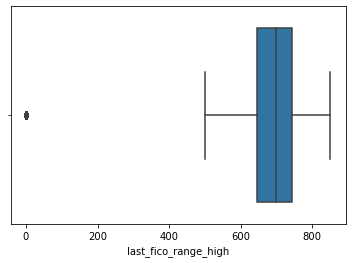

last_fico_range_low


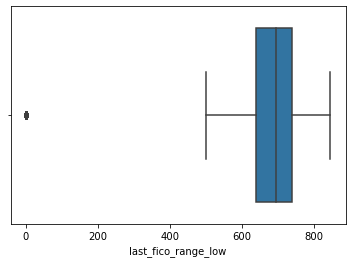

total_rec_prncp


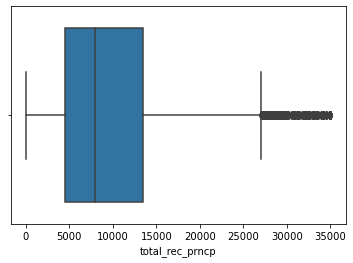

total_pymnt_inv


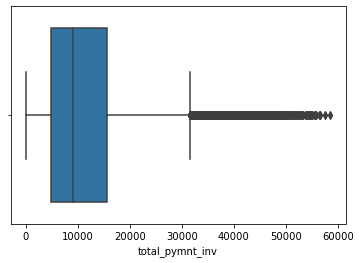

total_pymnt


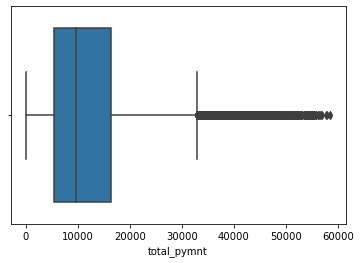

last_pymnt_amnt


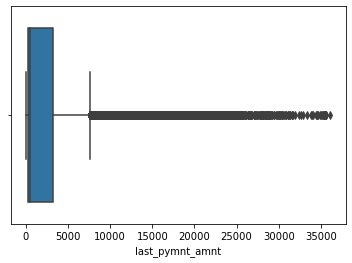

fico_range_high


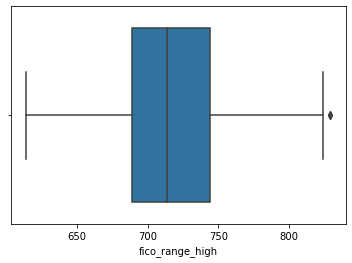

fico_range_low


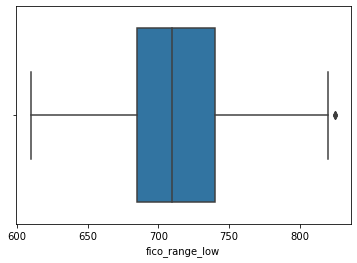

annual_inc


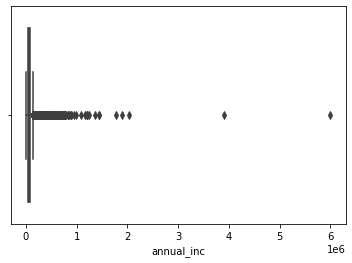

total_acc


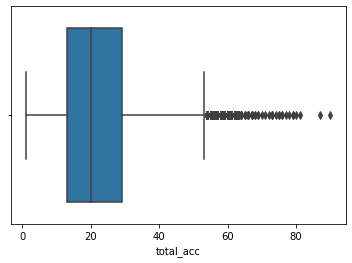

funded_amnt_inv


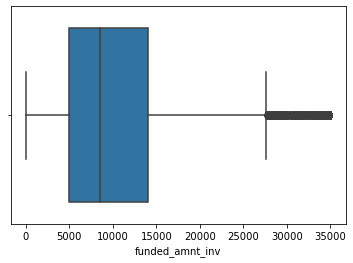

total_rec_int


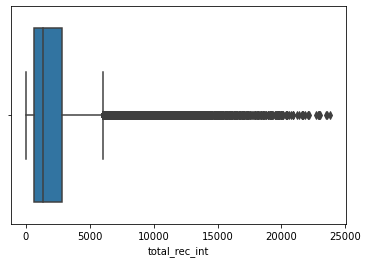

out_prncp


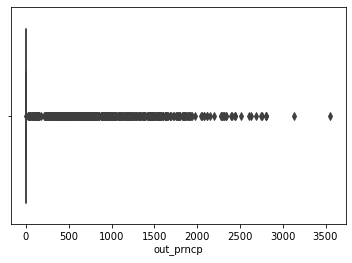

out_prncp_inv


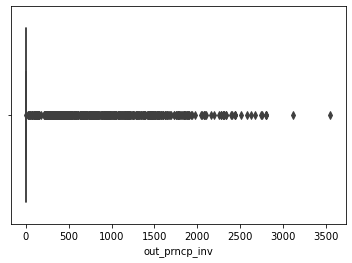

open_acc


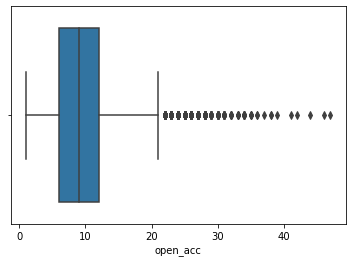

installment


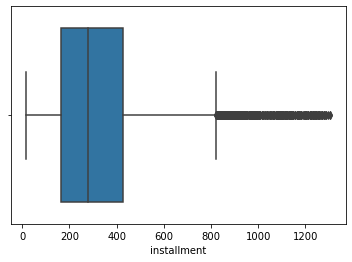

last_pymnt_d


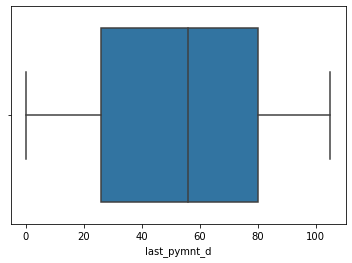

funded_amnt


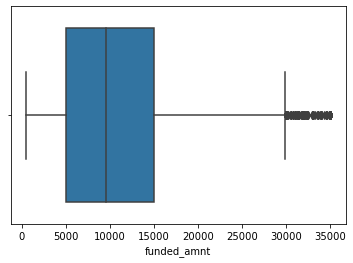

pymnt_plan


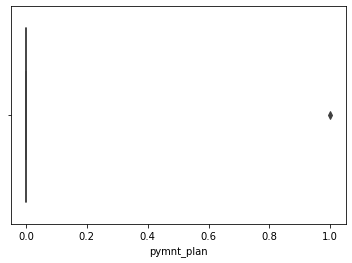

delinq_amnt


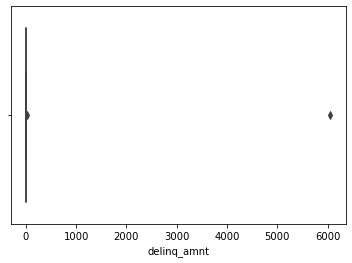

emp_length_year


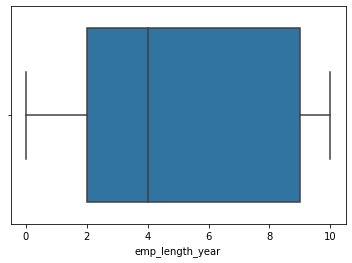

loan_amnt


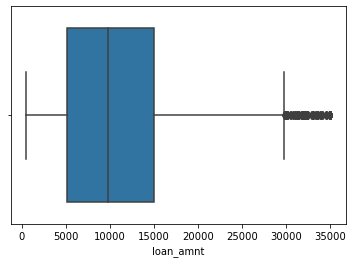

loan_status


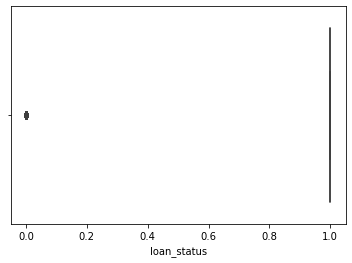

In [45]:
# Using For Loop to Get all Column Outliers Chart.

for i in df:
    print(i)
    
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

In [46]:
df.columns

Index(['last_fico_range_high', 'last_fico_range_low', 'total_rec_prncp',
       'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'fico_range_high',
       'fico_range_low', 'annual_inc', 'total_acc', 'funded_amnt_inv',
       'total_rec_int', 'out_prncp', 'out_prncp_inv', 'open_acc',
       'installment', 'last_pymnt_d', 'funded_amnt', 'pymnt_plan',
       'delinq_amnt', 'emp_length_year', 'loan_amnt', 'loan_status'],
      dtype='object')

In [47]:
# Checking last_pymnt_amnt Column Outliers.

sample_Balance = df['last_pymnt_amnt']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 10 % Data in last_pymnt_amnt Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 89 % Data in last_pymnt_amnt Column Has No Outliers.

df = no_outlier_ht
# df6 = no_outlier_ht

Q1 : 213.0525
Q3 : 3181.895 

IQR : 2968.8424999999997 

lower limit Outlier : -4240.21125
Upper limit Outlier : 7635.1587500000005 

outlier_ht : 4649
no_outlier_ht : 37771 

Outlier in (%) : 0.10959453088165959
No Outlier in (%) : 0.8904054691183404


In [48]:
# Checking last_fico_range_high Column Outliers.

sample_Balance = df['last_fico_range_high']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in last_fico_range_high Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 99 % Data in last_fico_range_high Column Has No Outliers.

# df1 = no_outlier_ht

Q1 : 639.0
Q3 : 744.0 

IQR : 105.0 

lower limit Outlier : 481.5
Upper limit Outlier : 901.5 

outlier_ht : 32
no_outlier_ht : 37739 

Outlier in (%) : 0.0007543611504007544
No Outlier in (%) : 0.8896511079679397


In [49]:
# Checking last_fico_range_low Column Outliers.

sample_Balance = df['last_fico_range_low']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in last_fico_range_low Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 98 % Data in last_fico_range_low Column Has No Outliers.

# df2 = no_outlier_ht

Q1 : 635.0
Q3 : 740.0 

IQR : 105.0 

lower limit Outlier : 477.5
Upper limit Outlier : 897.5 

outlier_ht : 758
no_outlier_ht : 37013 

Outlier in (%) : 0.01786892975011787
No Outlier in (%) : 0.8725365393682225


In [50]:
# Checking total_rec_prncp Column Outliers.

sample_Balance = df['total_rec_prncp']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in total_rec_prncp Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 97 % Data in total_rec_prncp Column Has No Outliers.

# df3 = no_outlier_ht

Q1 : 4000.0
Q3 : 12000.0 

IQR : 8000.0 

lower limit Outlier : -8000.0
Upper limit Outlier : 24000.0 

outlier_ht : 1227
no_outlier_ht : 36372 

Outlier in (%) : 0.028925035360678926
No Outlier in (%) : 0.8574257425742574


In [51]:
# Checking total_pymnt_inv Column Outliers.

sample_Balance = df['total_pymnt_inv']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in total_pymnt_inv Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 96 % Data in total_pymnt_inv Column Has No Outliers.

# df4 = no_outlier_ht

Q1 : 4394.34
Q3 : 13577.94 

IQR : 9183.6 

lower limit Outlier : -9381.060000000001
Upper limit Outlier : 27353.340000000004 

outlier_ht : 1780
no_outlier_ht : 35991 

Outlier in (%) : 0.041961338991041965
No Outlier in (%) : 0.8484441301272985


In [52]:
# Checking total_pymnt Column Outliers.

sample_Balance = df['total_pymnt']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in total_pymnt Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 96 % Data in total_pymnt Column Has No Outliers.

# df5 = no_outlier_ht

Q1 : 5038.835
Q3 : 14287.48 

IQR : 9248.645 

lower limit Outlier : -8834.1325
Upper limit Outlier : 28160.447500000002 

outlier_ht : 1804
no_outlier_ht : 35967 

Outlier in (%) : 0.042527109853842525
No Outlier in (%) : 0.8478783592644978


In [54]:
# Checking fico_range_high Column Outliers.

sample_Balance = df['fico_range_high']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in fico_range_high Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 99 % Data in fico_range_high Column Has No Outliers.

# df7 = no_outlier_ht

Q1 : 689.0
Q3 : 739.0 

IQR : 50.0 

lower limit Outlier : 614.0
Upper limit Outlier : 814.0 

outlier_ht : 43
no_outlier_ht : 37623 

Outlier in (%) : 0.0010136727958510137
No Outlier in (%) : 0.886916548797737


In [55]:
# Checking fico_range_low Column Outliers.

sample_Balance = df['fico_range_low']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in fico_range_low Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 99 % Data in fico_range_low Column Has No Outliers.

# df8 = no_outlier_ht

Q1 : 685.0
Q3 : 735.0 

IQR : 50.0 

lower limit Outlier : 610.0
Upper limit Outlier : 810.0 

outlier_ht : 43
no_outlier_ht : 37623 

Outlier in (%) : 0.0010136727958510137
No Outlier in (%) : 0.886916548797737


In [56]:
# Checking annual_inc Column Outliers.

sample_Balance = df['annual_inc']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in annual_inc Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 95 % Data in annual_inc Column Has No Outliers.

# df9 = no_outlier_ht

Q1 : 40000.0
Q3 : 80000.0 

IQR : 40000.0 

lower limit Outlier : -20000.0
Upper limit Outlier : 140000.0 

outlier_ht : 1719
no_outlier_ht : 35915 

Outlier in (%) : 0.040523338048090524
No Outlier in (%) : 0.8466525223950967


In [57]:
# Checking total_acc Column Outliers.

sample_Balance = df['total_acc']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in total_acc Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 98 % Data in total_acc Column Has No Outliers.

# df10 = no_outlier_ht

Q1 : 13.0
Q3 : 28.0 

IQR : 15.0 

lower limit Outlier : -9.5
Upper limit Outlier : 50.5 

outlier_ht : 737
no_outlier_ht : 37034 

Outlier in (%) : 0.017373880245167374
No Outlier in (%) : 0.873031588873173


In [58]:
# Checking funded_amnt_inv Column Outliers.

sample_Balance = df['funded_amnt_inv']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in funded_amnt_inv Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 97 % Data in funded_amnt_inv Column Has No Outliers.

# df11 = no_outlier_ht

Q1 : 4600.0
Q3 : 12000.0 

IQR : 7400.0 

lower limit Outlier : -6500.0
Upper limit Outlier : 23100.0 

outlier_ht : 1804
no_outlier_ht : 35967 

Outlier in (%) : 0.042527109853842525
No Outlier in (%) : 0.8478783592644978


In [59]:
# Checking total_rec_int Column Outliers.

sample_Balance = df['total_rec_int']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in total_rec_int Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 92 % Data in total_rec_int Column Has No Outliers.

# df12 = no_outlier_ht

Q1 : 638.085
Q3 : 2572.04 

IQR : 1933.955 

lower limit Outlier : -2262.8475
Upper limit Outlier : 5472.9725 

outlier_ht : 2983
no_outlier_ht : 34788 

Outlier in (%) : 0.07032060348892032
No Outlier in (%) : 0.8200848656294201


In [60]:
# Checking out_prncp Column Outliers.

sample_Balance = df['out_prncp']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in out_prncp Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in out_prncp Column Has No Outliers.

# df13 = no_outlier_ht

Q1 : 0.0
Q3 : 0.0 

IQR : 0.0 

lower limit Outlier : 0.0
Upper limit Outlier : 0.0 

outlier_ht : 547
no_outlier_ht : 0 

Outlier in (%) : 0.012894860914662895
No Outlier in (%) : 0.0


In [61]:
# Checking out_prncp_inv Column Outliers.

sample_Balance = df['out_prncp_inv']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in out_prncp_inv Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in out_prncp_inv Column Has No Outliers.

# df14 = no_outlier_ht

Q1 : 0.0
Q3 : 0.0 

IQR : 0.0 

lower limit Outlier : 0.0
Upper limit Outlier : 0.0 

outlier_ht : 547
no_outlier_ht : 0 

Outlier in (%) : 0.012894860914662895
No Outlier in (%) : 0.0


In [62]:
# Checking open_acc Column Outliers.

sample_Balance = df['open_acc']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in open_acc Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in open_acc Column Has No Outliers.

# df15 = no_outlier_ht

Q1 : 6.0
Q3 : 12.0 

IQR : 6.0 

lower limit Outlier : -3.0
Upper limit Outlier : 21.0 

outlier_ht : 540
no_outlier_ht : 36988 

Outlier in (%) : 0.01272984441301273
No Outlier in (%) : 0.8719471947194719


In [63]:
# Checking installment Column Outliers.

sample_Balance = df['installment']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in installment Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in installment Column Has No Outliers.

# df16 = no_outlier_ht

Q1 : 156.46
Q3 : 387.19 

IQR : 230.73 

lower limit Outlier : -189.63499999999996
Upper limit Outlier : 733.285 

outlier_ht : 1551
no_outlier_ht : 36220 

Outlier in (%) : 0.03656294200848656
No Outlier in (%) : 0.8538425271098539


In [64]:
# Checking last_pymnt_d Column Outliers.

sample_Balance = df['last_pymnt_d']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in last_pymnt_d Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 100 % Data in last_pymnt_d Column Has No Outliers.

# df17 = no_outlier_ht

Q1 : 26.0
Q3 : 82.0 

IQR : 56.0 

lower limit Outlier : -58.0
Upper limit Outlier : 166.0 

outlier_ht : 0
no_outlier_ht : 37771 

Outlier in (%) : 0.0
No Outlier in (%) : 0.8904054691183404


In [65]:
# Checking funded_amnt Column Outliers.

sample_Balance = df['funded_amnt']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in funded_amnt Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 97 % Data in funded_amnt Column Has No Outliers.

# df18 = no_outlier_ht

Q1 : 5000.0
Q3 : 13000.0 

IQR : 8000.0 

lower limit Outlier : -7000.0
Upper limit Outlier : 25000.0 

outlier_ht : 794
no_outlier_ht : 36149 

Outlier in (%) : 0.018717586044318717
No Outlier in (%) : 0.8521687883074022


In [66]:
# Checking pymnt_plan Column Outliers.

sample_Balance = df['pymnt_plan']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 2 % Data in pymnt_plan Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in pymnt_plan Column Has No Outliers.

# df19 = no_outlier_ht

Q1 : 0.0
Q3 : 0.0 

IQR : 0.0 

lower limit Outlier : 0.0
Upper limit Outlier : 0.0 

outlier_ht : 1
no_outlier_ht : 0 

Outlier in (%) : 2.3573785950023575e-05
No Outlier in (%) : 0.0


In [67]:
# Checking delinq_amnt Column Outliers.

sample_Balance = df['delinq_amnt']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 4 % Data in delinq_amnt Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in delinq_amnt Column Has No Outliers.

# df20 = no_outlier_ht

Q1 : 0.0
Q3 : 0.0 

IQR : 0.0 

lower limit Outlier : 0.0
Upper limit Outlier : 0.0 

outlier_ht : 2
no_outlier_ht : 0 

Outlier in (%) : 4.714757190004715e-05
No Outlier in (%) : 0.0


In [68]:
# Checking emp_length_year Column Outliers.

sample_Balance = df['emp_length_year']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in emp_length_year Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 100 % Data in emp_length_year Column Has No Outliers.

# df21 = no_outlier_ht

Q1 : 2.0
Q3 : 8.0 

IQR : 6.0 

lower limit Outlier : -7.0
Upper limit Outlier : 17.0 

outlier_ht : 0
no_outlier_ht : 37771 

Outlier in (%) : 0.0
No Outlier in (%) : 0.8904054691183404


In [69]:
# Checking loan_amnt Column Outliers.

sample_Balance = df['loan_amnt']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in loan_amnt Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 97 % Data in loan_amnt Column Has No Outliers.

# df22 = no_outlier_ht

Q1 : 5000.0
Q3 : 13600.0 

IQR : 8600.0 

lower limit Outlier : -7900.0
Upper limit Outlier : 26500.0 

outlier_ht : 844
no_outlier_ht : 36920 

Outlier in (%) : 0.019896275341819897
No Outlier in (%) : 0.8703441772748703


In [70]:
# Checking loan_status Column Outliers.

sample_Balance = df['loan_status']
q1 = sample_Balance.quantile(0.25)
q3 = sample_Balance.quantile(0.75)
iqr = q3 - q1
lower_limit_ht = q1-1.5*iqr
upper_limit_ht = q3+1.5*iqr
outlier_ht = df[(sample_Balance < lower_limit_ht) | (sample_Balance > upper_limit_ht)]
no_outlier_ht = df[(sample_Balance > lower_limit_ht) & (sample_Balance < upper_limit_ht)]

print('Q1 :',q1)
print('Q3 :',q3,'\n')

print('IQR :',iqr,'\n')

print('lower limit Outlier :',lower_limit_ht)
print('Upper limit Outlier :',upper_limit_ht,'\n')

print('outlier_ht :',len(outlier_ht))
print('no_outlier_ht :',len(no_outlier_ht),'\n')

print('Outlier in (%) :',len(outlier_ht)/42420)                 # 0 % Data in loan_status Column Has Outliers.
print('No Outlier in (%) :',len(no_outlier_ht)/42420)           # 0 % Data in loan_status Column Has No Outliers.

# df23 = no_outlier_ht

Q1 : 1.0
Q3 : 1.0 

IQR : 0.0 

lower limit Outlier : 1.0
Upper limit Outlier : 1.0 

outlier_ht : 8245
no_outlier_ht : 0 

Outlier in (%) : 0.19436586515794438
No Outlier in (%) : 0.0


In [71]:
# dff = pd.concat([df1 , df2 , df3 , df4 , df5 , df6 , df7 , df8 , df9 , df10 , df11 , df12 , df13 , df14
#                 , df15 , df16 , df17 , df18 , df19 , df20 , df21 , df22 , df23],ignore_index=True)

In [72]:
# dff.isnull().sum()

last_fico_range_high


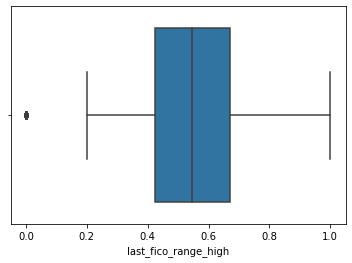

last_fico_range_low


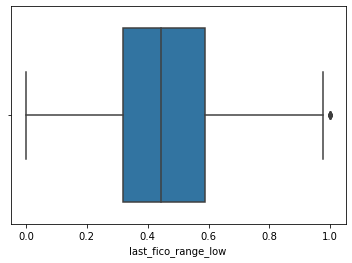

total_rec_prncp


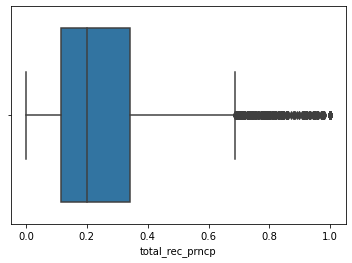

total_pymnt_inv


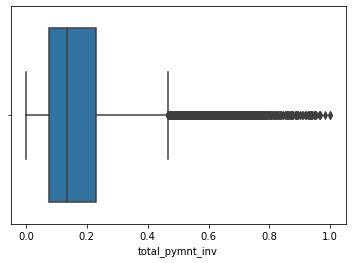

total_pymnt


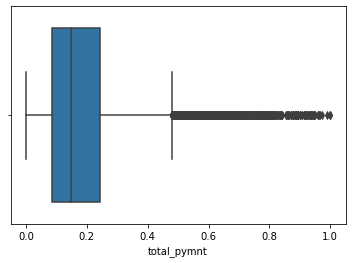

last_pymnt_amnt


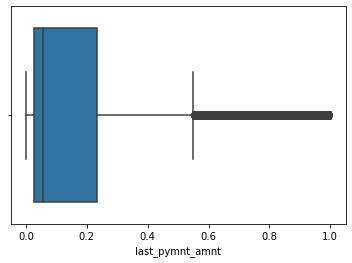

fico_range_high


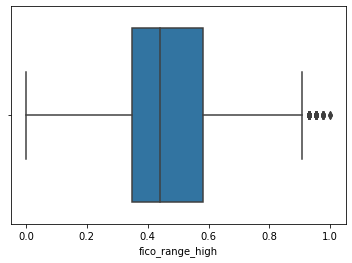

fico_range_low


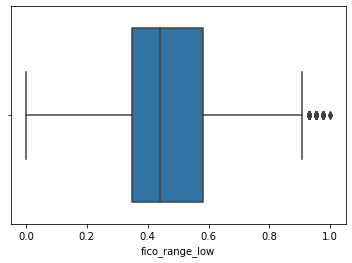

annual_inc


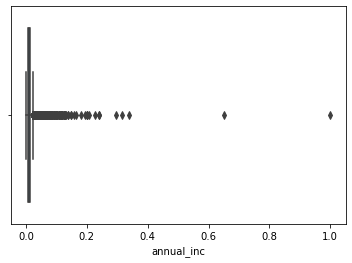

total_acc


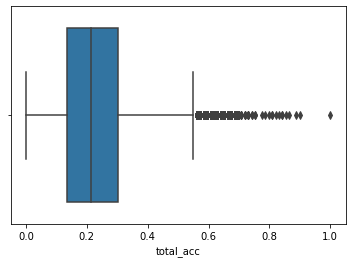

funded_amnt_inv


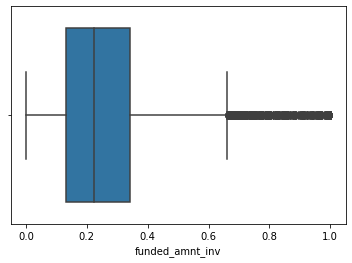

total_rec_int


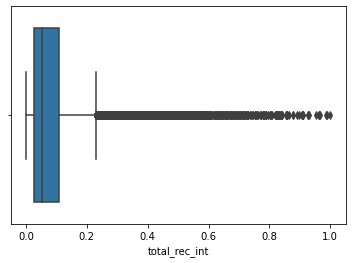

out_prncp


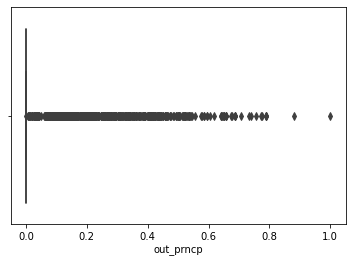

out_prncp_inv


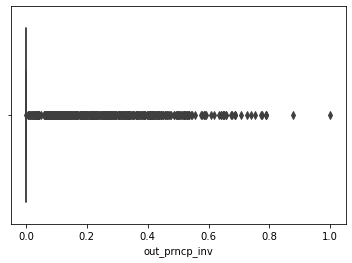

open_acc


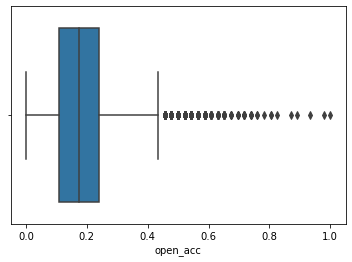

installment


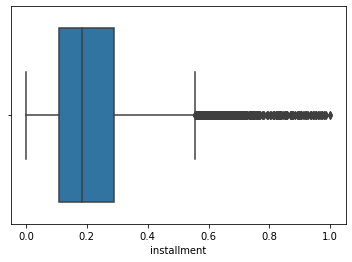

last_pymnt_d


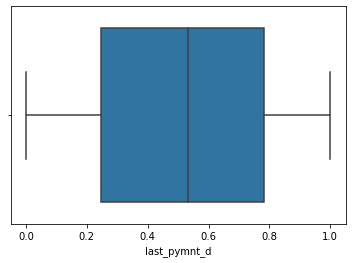

funded_amnt


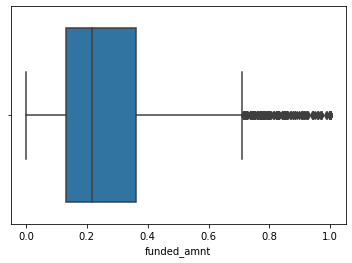

emp_length_year


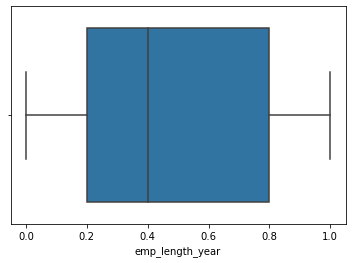

loan_amnt


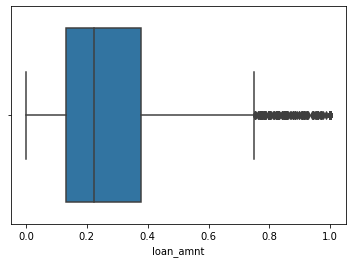

loan_status


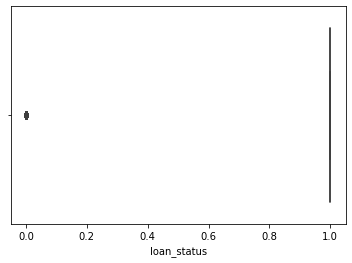

In [137]:
# Using For Loop to Get all Column Outliers Chart.

for i in df:
    print(i)
    
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

In [73]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
last_fico_range_high,37771.0,686.273570,81.050404,0.00,639.000,694.00,744.000,850.00
last_fico_range_low,37771.0,672.762304,121.439159,0.00,635.000,690.00,740.000,845.00
total_rec_prncp,37771.0,8560.923601,6248.161365,0.00,4000.000,7000.00,12000.000,35000.00
total_pymnt_inv,37771.0,10098.331732,8086.242847,0.00,4394.340,7957.06,13577.940,58563.68
total_pymnt,37771.0,10757.237529,8142.592860,33.73,5038.835,8614.23,14287.480,58563.68
last_pymnt_amnt,37771.0,1332.437796,1820.412711,0.00,191.340,423.61,1791.205,7635.09
fico_range_high,37771.0,716.211088,36.153746,614.00,689.000,709.00,739.000,829.00
fico_range_low,37771.0,712.211088,36.153746,610.00,685.000,705.00,735.000,825.00
annual_inc,37771.0,66574.674142,64091.155931,1896.00,40000.000,56000.00,80000.000,6000000.00
total_acc,37771.0,21.582484,11.429384,1.00,13.000,20.00,28.000,90.00


<AxesSubplot:xlabel='last_pymnt_amnt'>

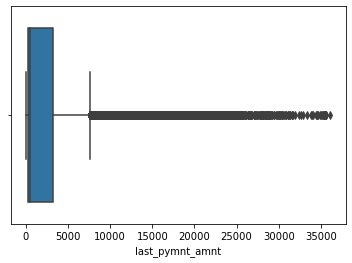

In [74]:
sns.boxplot(d1['last_pymnt_amnt'])                                                               # Before Handling Outliers.

<AxesSubplot:xlabel='last_pymnt_amnt'>

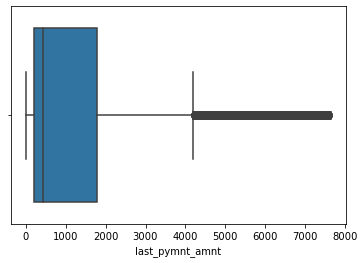

In [75]:
sns.boxplot(df['last_pymnt_amnt'])                                                      # After Handlig Outliers.

In [76]:
df.columns

Index(['last_fico_range_high', 'last_fico_range_low', 'total_rec_prncp',
       'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'fico_range_high',
       'fico_range_low', 'annual_inc', 'total_acc', 'funded_amnt_inv',
       'total_rec_int', 'out_prncp', 'out_prncp_inv', 'open_acc',
       'installment', 'last_pymnt_d', 'funded_amnt', 'pymnt_plan',
       'delinq_amnt', 'emp_length_year', 'loan_amnt', 'loan_status'],
      dtype='object')

* <p style="color:#053bfc;">Note :-</p>  
  
  So After Using IQR Technique. We Can See That the Large No of Outliers are Handel.\
  10% Data Has Outliers & 89% Data Has No Outliers.\
  After Handeling Outliers of last_pymnt_amnt Column There is No Outliers in Other Columns.\
  So We Can Go With No Outliers Data of last_pymnt_amnt Column.

In [77]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
last_fico_range_high,37771.0,686.273570,81.050404,0.00,639.000,694.00,744.000,850.00
last_fico_range_low,37771.0,672.762304,121.439159,0.00,635.000,690.00,740.000,845.00
total_rec_prncp,37771.0,8560.923601,6248.161365,0.00,4000.000,7000.00,12000.000,35000.00
total_pymnt_inv,37771.0,10098.331732,8086.242847,0.00,4394.340,7957.06,13577.940,58563.68
total_pymnt,37771.0,10757.237529,8142.592860,33.73,5038.835,8614.23,14287.480,58563.68
last_pymnt_amnt,37771.0,1332.437796,1820.412711,0.00,191.340,423.61,1791.205,7635.09
fico_range_high,37771.0,716.211088,36.153746,614.00,689.000,709.00,739.000,829.00
fico_range_low,37771.0,712.211088,36.153746,610.00,685.000,705.00,735.000,825.00
annual_inc,37771.0,66574.674142,64091.155931,1896.00,40000.000,56000.00,80000.000,6000000.00
total_acc,37771.0,21.582484,11.429384,1.00,13.000,20.00,28.000,90.00


### Skewness Detection / Handling :-

In [78]:
from scipy.stats import skew 

last_fico_range_high
-0.9308601882137667


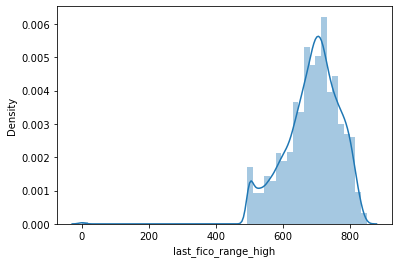

last_fico_range_low
-3.3768988034333973


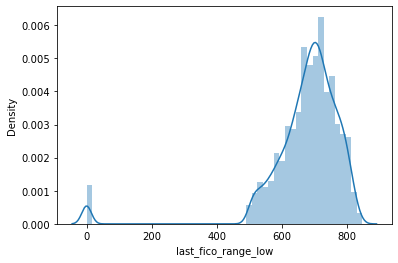

total_rec_prncp
1.2590897961798049


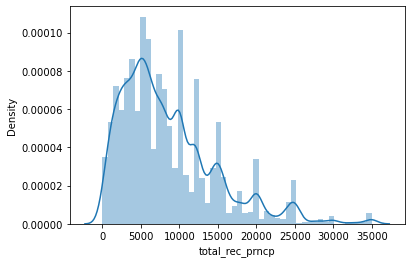

total_pymnt_inv
1.5378182089293926


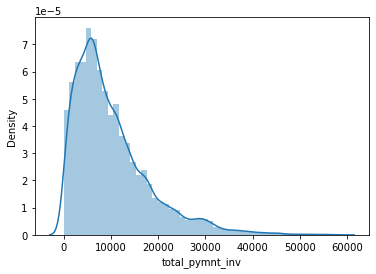

total_pymnt
1.523665084565112


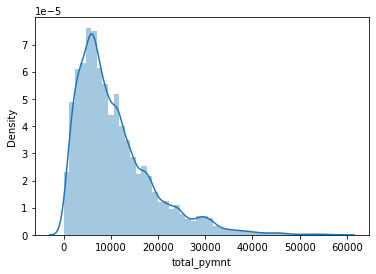

last_pymnt_amnt
1.7254381866315258


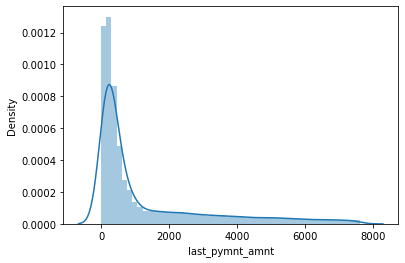

fico_range_high
0.4859769436561732


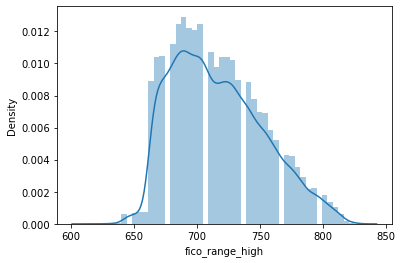

fico_range_low
0.4859769436561732


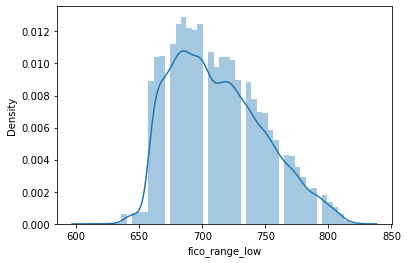

annual_inc
32.16122837211086


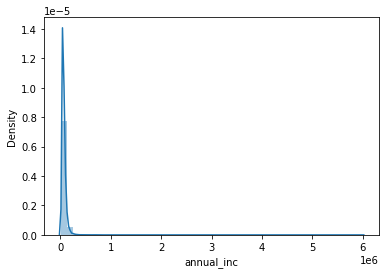

total_acc
0.8415151050102078


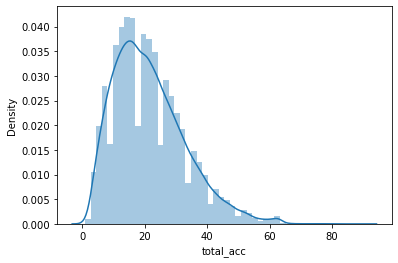

funded_amnt_inv
1.244888120429612


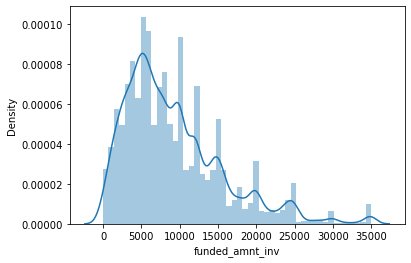

total_rec_int
2.894710812897863


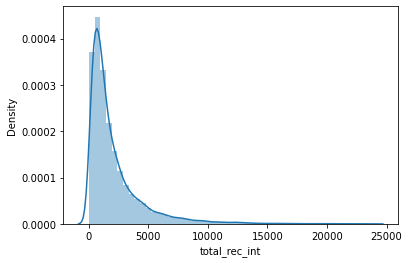

out_prncp
12.472771073269199


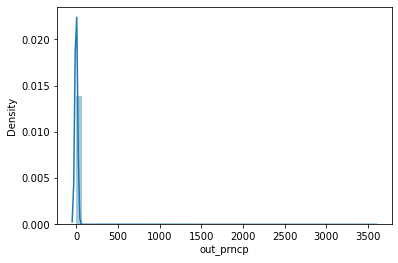

out_prncp_inv
12.479792493359843


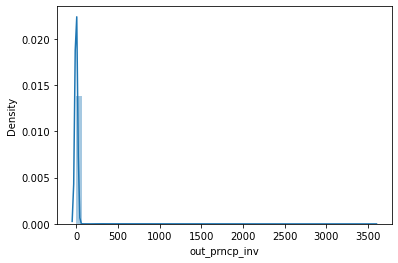

open_acc
1.0620689548822768


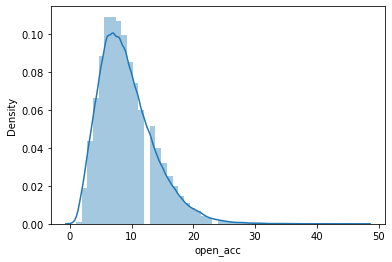

installment
1.2694715842293107


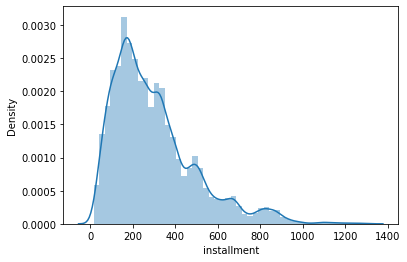

last_pymnt_d
-0.026267091314846388


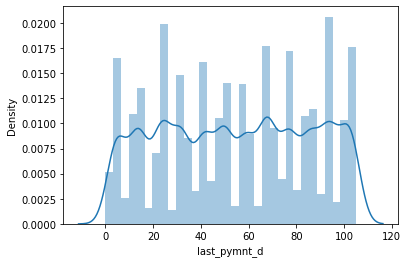

funded_amnt
1.2311097333099044


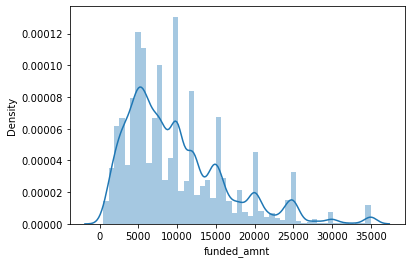

pymnt_plan
194.33990847604113


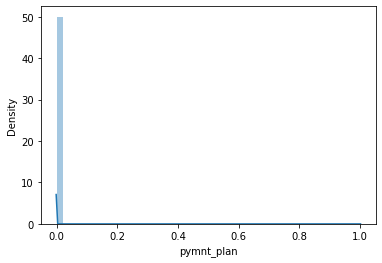

delinq_amnt
194.3341254066095


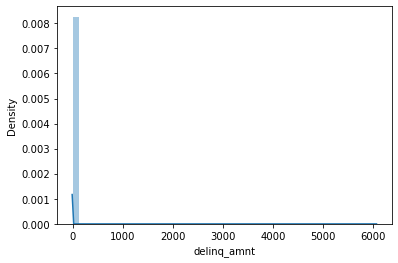

emp_length_year
0.2818817682587311


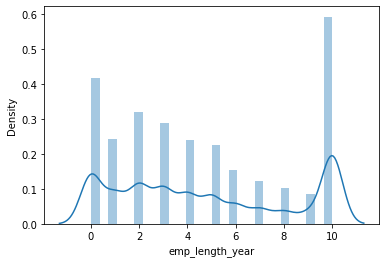

loan_amnt
1.2155759315345631


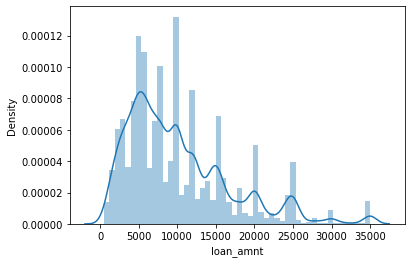

loan_status
-1.3639372613542282


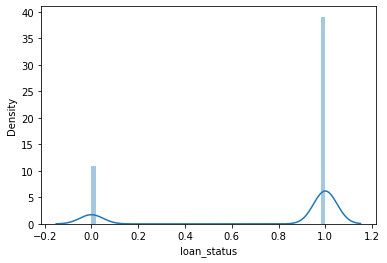

In [79]:
# Using For Loop to Get all Column Skewness Chart With There Score.

for i in df:
    print(i)
    print(skew(df[i]))
    
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [80]:
# Using For Loop to Get all Column Skewness Score.

for i in df:
    print(i)
    print(skew(df[i]),'\n')

last_fico_range_high
-0.9308601882137667 

last_fico_range_low
-3.3768988034333973 

total_rec_prncp
1.2590897961798049 

total_pymnt_inv
1.5378182089293926 

total_pymnt
1.523665084565112 

last_pymnt_amnt
1.7254381866315258 

fico_range_high
0.4859769436561732 

fico_range_low
0.4859769436561732 

annual_inc
32.16122837211086 

total_acc
0.8415151050102078 

funded_amnt_inv
1.244888120429612 

total_rec_int
2.894710812897863 

out_prncp
12.472771073269199 

out_prncp_inv
12.479792493359843 

open_acc
1.0620689548822768 

installment
1.2694715842293107 

last_pymnt_d
-0.026267091314846388 

funded_amnt
1.2311097333099044 

pymnt_plan
194.33990847604113 

delinq_amnt
194.3341254066095 

emp_length_year
0.2818817682587311 

loan_amnt
1.2155759315345631 

loan_status
-1.3639372613542282 



In [81]:
for i in df:
    sqr = np.sqrt(df[i])
    cbr = np.cbrt(df[i])
    value = sqr.skew()
    value1 = cbr.skew()
    print(f'{i} sknewness is : {value:.2f}')
    
    print(f'{i} sknewness is : {value1:.2f}')
    print("\n")

last_fico_range_high sknewness is : -3.45
last_fico_range_high sknewness is : -7.57


last_fico_range_low sknewness is : -5.50
last_fico_range_low sknewness is : -6.18


total_rec_prncp sknewness is : 0.30
total_rec_prncp sknewness is : -0.08


total_pymnt_inv sknewness is : 0.39
total_pymnt_inv sknewness is : -0.17


total_pymnt sknewness is : 0.52
total_pymnt sknewness is : 0.15


last_pymnt_amnt sknewness is : 1.05
last_pymnt_amnt sknewness is : 0.74


fico_range_high sknewness is : 0.44
fico_range_high sknewness is : 0.42


fico_range_low sknewness is : 0.44
fico_range_low sknewness is : 0.42


annual_inc sknewness is : 3.00
annual_inc sknewness is : 1.48


total_acc sknewness is : 0.16
total_acc sknewness is : -0.09


funded_amnt_inv sknewness is : 0.24
funded_amnt_inv sknewness is : -0.32


total_rec_int sknewness is : 1.22
total_rec_int sknewness is : 0.71


out_prncp sknewness is : 9.52
out_prncp sknewness is : 8.83


out_prncp_inv sknewness is : 9.52
out_prncp_inv sknewness is

In [82]:
# Handeling last_fico_range_high Column Skewness.

df['last_fico_range_high'] = np.power(df['last_fico_range_high'],3)
skew(df['last_fico_range_high'])

-0.0033591266194576835

In [83]:
# Handeling last_fico_range_low Column Skewness.

df['last_fico_range_low'] = np.power(df['last_fico_range_low'],4)
skew(df['last_fico_range_low'])

0.11107927372888585

In [85]:
df = df.drop(["pymnt_plan","delinq_amnt"],axis="columns")

# "out_prncp","out_prncp_inv"

last_fico_range_high
-0.0033591266194576835


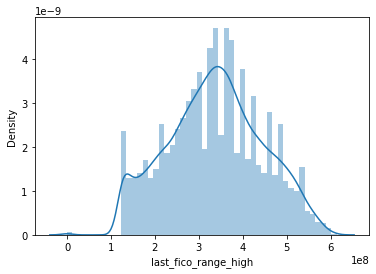

last_fico_range_low
0.11107927372888585


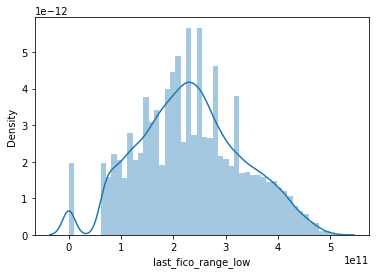

total_rec_prncp
1.2590897961798049


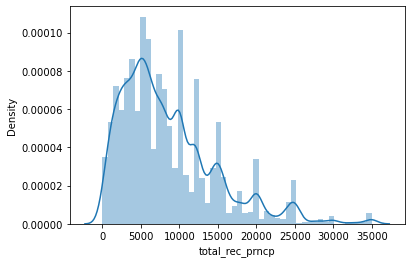

total_pymnt_inv
1.5378182089293926


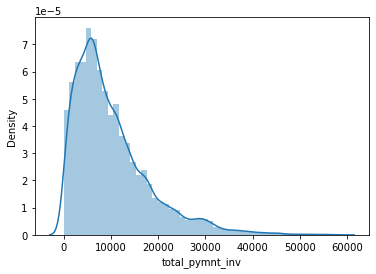

total_pymnt
1.523665084565112


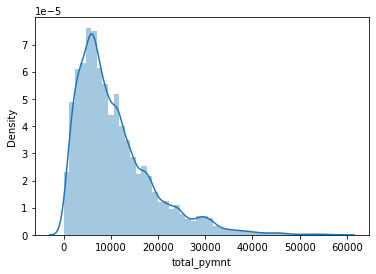

last_pymnt_amnt
1.7254381866315258


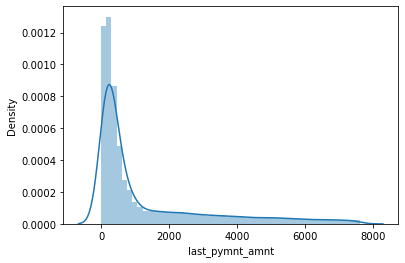

fico_range_high
0.4859769436561732


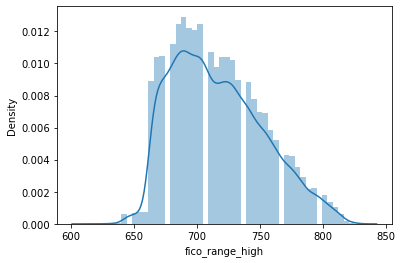

fico_range_low
0.4859769436561732


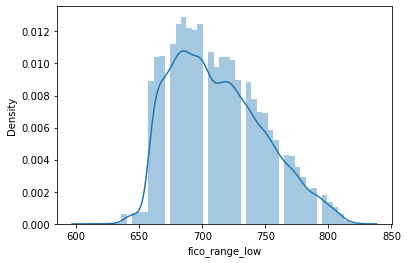

annual_inc
32.16122837211086


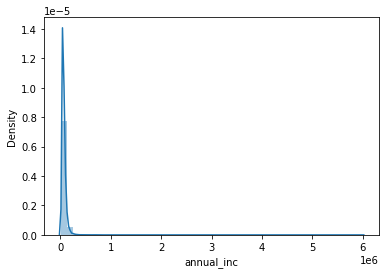

total_acc
0.8415151050102078


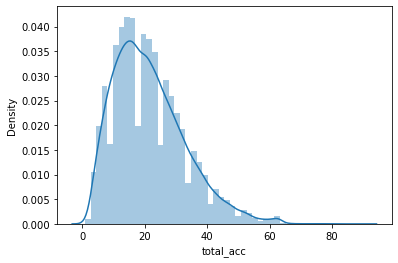

funded_amnt_inv
1.244888120429612


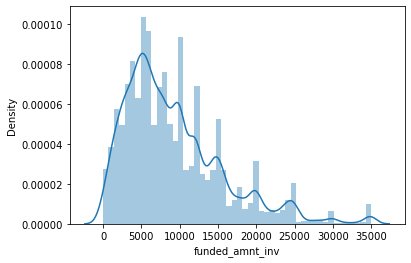

total_rec_int
2.894710812897863


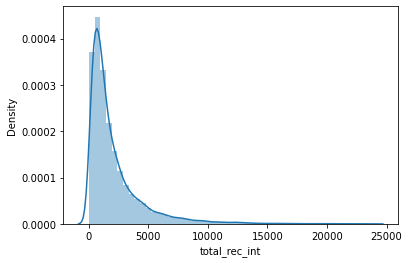

out_prncp
12.472771073269199


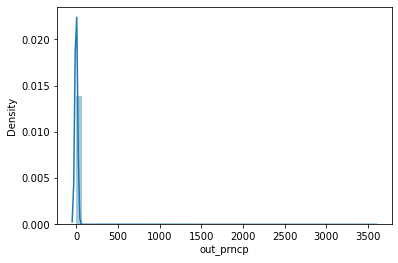

out_prncp_inv
12.479792493359843


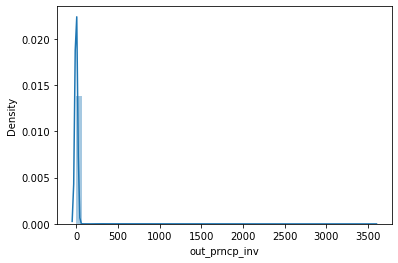

open_acc
1.0620689548822768


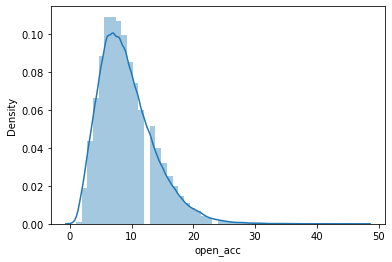

installment
1.2694715842293107


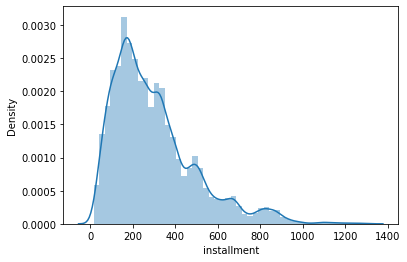

last_pymnt_d
-0.026267091314846388


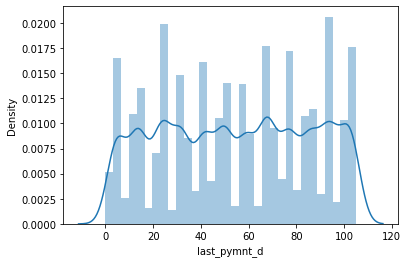

funded_amnt
1.2311097333099044


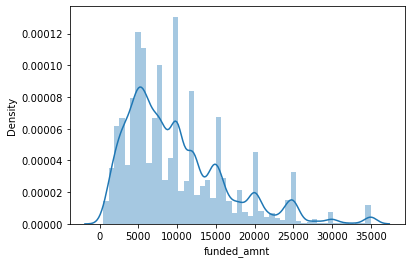

emp_length_year
0.2818817682587311


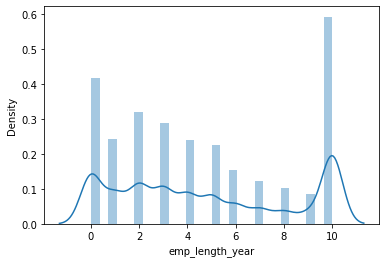

loan_amnt
1.2155759315345631


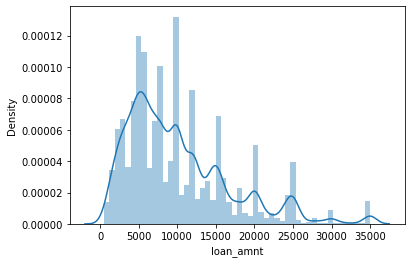

loan_status
-1.3639372613542282


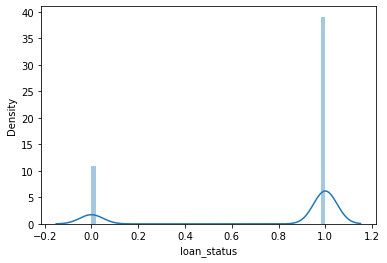

In [86]:
# Using For Loop to Get all Column Skewness Chart With There Score.

for i in df:
    print(i)
    print(skew(df[i]))
    
    plt.figure()
    sns.distplot(df[i])
    plt.show()

* <p style="color:#053bfc;">Note :-</p>  

    Even After Handeling Skewness There are Still Some Column in Which the Skewness has not been handled.\
    So I Decide to Skip That Column and Do Further Process.

=========================================================================================================================

* <p style="color:#e00707;">Step 5 :</p>
  
     <p style="color:#053bfc;">Train & Test The Model</p>

In [ ]:
sns.pairplot(df,hue='loan_status')

* <p style="color:#053bfc;">Note :-</p>  

    With the Help of Seaborn (Pairplot) We Can Easly to Chose Which Machine Leraning Algorithm is Good to Apply 
    & Get Better Accuracy Score.

========================================================================================================================= 

In [87]:
df.columns

Index(['last_fico_range_high', 'last_fico_range_low', 'total_rec_prncp',
       'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'fico_range_high',
       'fico_range_low', 'annual_inc', 'total_acc', 'funded_amnt_inv',
       'total_rec_int', 'out_prncp', 'out_prncp_inv', 'open_acc',
       'installment', 'last_pymnt_d', 'funded_amnt', 'emp_length_year',
       'loan_amnt', 'loan_status'],
      dtype='object')

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Scaler = scaler.fit(df)
scaled_data = Scaler.transform(df)
df = pd.DataFrame(scaled_data,columns=df.columns)

In [89]:
df

,last_fico_range_high,last_fico_range_low,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,fico_range_high,fico_range_low,annual_inc,total_acc,...,total_rec_int,out_prncp,out_prncp_inv,open_acc,installment,last_pymnt_d,funded_amnt,emp_length_year,loan_amnt,loan_status
0,0.670598,0.588166,0.142857,0.099615,0.099597,0.022478,0.581395,0.581395,0.003685,0.089888,...,0.036088,0.000000,0.000000,0.043478,0.114151,0.409524,0.130435,1.0,0.130435,1.0
1,0.202323,0.000000,0.013042,0.017224,0.016658,0.015672,0.604651,0.604651,0.004685,0.033708,...,0.018120,0.000000,0.000000,0.043478,0.034245,0.047619,0.057971,0.0,0.057971,0.0
2,0.605243,0.512622,0.068571,0.051323,0.050776,0.085121,0.581395,0.581395,0.001727,0.101124,...,0.025278,0.000000,0.000000,0.021739,0.053245,0.571429,0.055072,1.0,0.055072,1.0
3,0.358801,0.254202,0.285714,0.208865,0.208409,0.046821,0.372093,0.372093,0.007886,0.404494,...,0.092836,0.000000,0.000000,0.195652,0.250977,0.409524,0.275362,1.0,0.275362,1.0
4,0.544279,0.444600,0.077978,0.064622,0.064083,0.008879,0.395349,0.395349,0.013021,0.415730,...,0.044153,0.076151,0.076205,0.304348,0.040418,1.000000,0.072464,0.1,0.072464,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37766,0.568148,0.470940,0.152857,0.012940,0.110252,0.138432,0.232558,0.232558,0.000351,0.000000,...,0.046945,0.000000,0.000000,0.000000,0.127877,0.276190,0.140580,0.1,0.140580,1.0
37767,0.202323,0.000000,0.285714,0.007544,0.215079,0.210299,0.186047,0.186047,0.008020,0.213483,...,0.107766,0.000000,0.000000,0.282609,0.255529,0.104762,0.275362,0.1,0.275362,0.0
37768,0.862162,0.823677,0.057143,0.024242,0.037473,0.008329,0.883721,0.883721,0.024692,0.168539,...,0.009382,0.000000,0.000000,0.130435,0.035827,0.447619,0.043478,0.7,0.043478,1.0
37769,0.740495,0.671767,0.171429,0.013004,0.119531,0.025849,0.395349,0.395349,0.003018,0.056180,...,0.043087,0.000000,0.000000,0.086957,0.139284,0.533333,0.159420,0.0,0.159420,1.0


In [91]:
x = df.iloc[:,:-1]                                                      # Independent Features.
y = df.iloc[:,-1]                                                       # Dependent Features.

In [92]:
# This is All are Independent Features.

x

,last_fico_range_high,last_fico_range_low,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,fico_range_high,fico_range_low,annual_inc,total_acc,funded_amnt_inv,total_rec_int,out_prncp,out_prncp_inv,open_acc,installment,last_pymnt_d,funded_amnt,emp_length_year,loan_amnt
0,0.670598,0.588166,0.142857,0.099615,0.099597,0.022478,0.581395,0.581395,0.003685,0.089888,0.142143,0.036088,0.000000,0.000000,0.043478,0.114151,0.409524,0.130435,1.0,0.130435
1,0.202323,0.000000,0.013042,0.017224,0.016658,0.015672,0.604651,0.604651,0.004685,0.033708,0.071429,0.018120,0.000000,0.000000,0.043478,0.034245,0.047619,0.057971,0.0,0.057971
2,0.605243,0.512622,0.068571,0.051323,0.050776,0.085121,0.581395,0.581395,0.001727,0.101124,0.068571,0.025278,0.000000,0.000000,0.021739,0.053245,0.571429,0.055072,1.0,0.055072
3,0.358801,0.254202,0.285714,0.208865,0.208409,0.046821,0.372093,0.372093,0.007886,0.404494,0.285714,0.092836,0.000000,0.000000,0.195652,0.250977,0.409524,0.275362,1.0,0.275362
4,0.544279,0.444600,0.077978,0.064622,0.064083,0.008879,0.395349,0.395349,0.013021,0.415730,0.085714,0.044153,0.076151,0.076205,0.304348,0.040418,1.000000,0.072464,0.1,0.072464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37766,0.568148,0.470940,0.152857,0.012940,0.110252,0.138432,0.232558,0.232558,0.000351,0.000000,0.017857,0.046945,0.000000,0.000000,0.000000,0.127877,0.276190,0.140580,0.1,0.140580
37767,0.202323,0.000000,0.285714,0.007544,0.215079,0.210299,0.186047,0.186047,0.008020,0.213483,0.010000,0.107766,0.000000,0.000000,0.282609,0.255529,0.104762,0.275362,0.1,0.275362
37768,0.862162,0.823677,0.057143,0.024242,0.037473,0.008329,0.883721,0.883721,0.024692,0.168539,0.036429,0.009382,0.000000,0.000000,0.130435,0.035827,0.447619,0.043478,0.7,0.043478
37769,0.740495,0.671767,0.171429,0.013004,0.119531,0.025849,0.395349,0.395349,0.003018,0.056180,0.018571,0.043087,0.000000,0.000000,0.086957,0.139284,0.533333,0.159420,0.0,0.159420


In [93]:
# This is All are Dependent Features.

y

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
37766    1.0
37767    0.0
37768    1.0
37769    1.0
37770    1.0
Name: loan_status, Length: 37771, dtype: float64

In [94]:
# Train Test Split the Data.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [95]:
x_train

,last_fico_range_high,last_fico_range_low,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,fico_range_high,fico_range_low,annual_inc,total_acc,funded_amnt_inv,total_rec_int,out_prncp,out_prncp_inv,open_acc,installment,last_pymnt_d,funded_amnt,emp_length_year,loan_amnt
13692,0.424860,0.318910,0.171429,0.131749,0.131248,0.000117,0.674419,0.674419,0.003685,0.089888,0.171429,0.071878,0.0,0.0,0.108696,0.087560,0.590476,0.159420,0.1,0.159420
5160,0.784678,0.726025,0.342857,0.222662,0.222214,0.250471,0.651163,0.651163,0.013855,0.426966,0.342857,0.043508,0.0,0.0,0.195652,0.271078,0.228571,0.333333,0.1,0.333333
22952,0.815088,0.763979,0.714286,0.501016,0.503754,0.120321,0.604651,0.604651,0.019357,0.292135,0.710000,0.189541,0.0,0.0,0.217391,0.623658,0.971429,0.710145,0.8,0.710145
1359,0.740495,0.671767,0.714286,0.595701,0.595468,0.936264,0.511628,0.511628,0.009687,0.370787,0.714286,0.414896,0.0,0.0,0.304348,0.445515,0.247619,0.710145,0.0,0.710145
16167,0.466015,0.361026,0.200000,0.128947,0.128445,0.378743,0.581395,0.581395,0.009687,0.123596,0.200000,0.023008,0.0,0.0,0.152174,0.152475,0.304762,0.188406,0.4,0.188406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.755033,0.689503,0.371429,0.269220,0.268799,0.059401,0.372093,0.372093,0.010521,0.112360,0.371429,0.115993,0.0,0.0,0.217391,0.327478,0.980952,0.362319,0.2,0.362319
32511,0.911014,0.886806,0.428571,0.244984,0.295526,0.066226,0.883721,0.883721,0.016356,0.314607,0.358607,0.097704,0.0,0.0,0.326087,0.361181,0.723810,0.420290,0.0,0.420290
5192,0.521089,0.419381,0.108571,0.068796,0.073107,0.138990,0.441860,0.441860,0.008687,0.303371,0.101429,0.021375,0.0,0.0,0.195652,0.081426,0.314286,0.095652,0.8,0.095652
12172,0.349964,0.245833,0.094286,0.068340,0.067803,0.015306,0.302326,0.302326,0.005186,0.224719,0.094286,0.029331,0.0,0.0,0.326087,0.074066,0.571429,0.081159,0.2,0.081159


In [96]:
y_train

13692    1.0
5160     1.0
22952    1.0
1359     1.0
16167    1.0
        ... 
7813     1.0
32511    1.0
5192     1.0
12172    1.0
33003    1.0
Name: loan_status, Length: 26439, dtype: float64

=========================================================================================================================

* <p style="color:#e00707;">Step 6 :</p>
  
     <p style="color:#053bfc;">Predict & Check Accuarcy Score</p>

In [97]:
# Creating a Function to Know Which ML Algorithm is Give Best Score.

from sklearn.metrics import classification_report

def mymodel(model):
    #model training
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    # checking for bias & variance
    train = model.score(x_train,y_train)
    test = model.score(x_test,y_test)
    print(f'Training Accuracy is {train}')
    print(f'Testing Accuracy is {test}')
    
    #model eval
    print(classification_report(y_test,ypred))
    return model

In [98]:
# Importing ML Model Using Sklearn.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
KNN_Cla = mymodel(KNeighborsClassifier())

Training Accuracy is 0.9638412950565453
Testing Accuracy is 0.9471408400988351
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      2472
         1.0       0.95      0.99      0.97      8860

    accuracy                           0.95     11332
   macro avg       0.95      0.90      0.92     11332
weighted avg       0.95      0.95      0.95     11332



In [100]:
Log_Reg = mymodel(LogisticRegression())

Training Accuracy is 0.9740913045122735
Testing Accuracy is 0.973967525591246
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      2472
         1.0       0.98      0.99      0.98      8860

    accuracy                           0.97     11332
   macro avg       0.97      0.95      0.96     11332
weighted avg       0.97      0.97      0.97     11332



In [101]:
DT_Cla = mymodel(DecisionTreeClassifier())

Training Accuracy is 1.0
Testing Accuracy is 0.9918813978115072
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2472
         1.0       0.99      1.00      0.99      8860

    accuracy                           0.99     11332
   macro avg       0.99      0.99      0.99     11332
weighted avg       0.99      0.99      0.99     11332



In [102]:
B_Cla = mymodel(BaggingClassifier())

Training Accuracy is 0.9996974166950339
Testing Accuracy is 0.9935580656547829
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2472
         1.0       0.99      1.00      1.00      8860

    accuracy                           0.99     11332
   macro avg       0.99      0.99      0.99     11332
weighted avg       0.99      0.99      0.99     11332



In [103]:
RF_Cla = mymodel(RandomForestClassifier())

Training Accuracy is 1.0
Testing Accuracy is 0.992763854571126
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2472
         1.0       0.99      1.00      1.00      8860

    accuracy                           0.99     11332
   macro avg       1.00      0.98      0.99     11332
weighted avg       0.99      0.99      0.99     11332



* <p style="color:#053bfc;">Note :-</p>  

    After Performing All the Models, It Has Been Found That the Decision Tree & Random Forest are Providing the Best           Accuracy Scores.
    
    Therefore, We Can Choose to Proceed With the Decision Tree.

In [104]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [105]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
y_test

35454    1.0
31361    1.0
15644    0.0
32659    1.0
28789    1.0
        ... 
17730    1.0
20926    1.0
14682    0.0
1848     1.0
29534    1.0
Name: loan_status, Length: 11332, dtype: float64

In [107]:
Ypredict = model.predict(x_test)

In [108]:
Ypredict

array([1., 1., 0., ..., 0., 1., 1.])

In [114]:
df.head().transpose()

,0,1,2,3,4
last_fico_range_high,0.670598,0.202323,0.605243,0.358801,0.544279
last_fico_range_low,0.588166,0.000000,0.512622,0.254202,0.444600
total_rec_prncp,0.142857,0.013042,0.068571,0.285714,0.077978
total_pymnt_inv,0.099615,0.017224,0.051323,0.208865,0.064622
total_pymnt,0.099597,0.016658,0.050776,0.208409,0.064083
last_pymnt_amnt,0.022478,0.015672,0.085121,0.046821,0.008879
fico_range_high,0.581395,0.604651,0.581395,0.372093,0.395349
fico_range_low,0.581395,0.604651,0.581395,0.372093,0.395349
annual_inc,0.003685,0.004685,0.001727,0.007886,0.013021
total_acc,0.089888,0.033708,0.101124,0.404494,0.415730


In [118]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,Ypredict)

0.9902047299682316

In [119]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Ypredict)
cm

array([[2421,   51],
       [  60, 8800]], dtype=int64)

Text(33.0, 0.5, 'Truth')

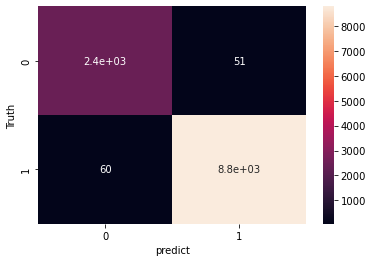

In [120]:
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('Truth')

* <p style="color:#053bfc;">Note :-</p>  

    So From the Above Y-Predict We Can See That Our Decision Tree Model Predict Good Accuracy. 

=========================================================================================================================

* <p style="color:#e00707;">Step 7 :</p>
  
     <p style="color:#053bfc;">Handel Overfitting & Underfitting</p>

In [122]:
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':list(range(1,5)),
    'min_samples_leaf':list(range(1,5))
}

In [123]:
parameters

{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3, 4],
 'min_samples_leaf': [1, 2, 3, 4]}

In [124]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_s

[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4]},
             verbose=2)

In [125]:
grid.best_score_

0.9422445429616845

In [126]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)

In [127]:
dt = mymodel(grid.best_estimator_)

Training Accuracy is 0.9444003177124702
Testing Accuracy is 0.9459936463113308
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      2472
         1.0       0.94      1.00      0.97      8860

    accuracy                           0.95     11332
   macro avg       0.97      0.88      0.91     11332
weighted avg       0.95      0.95      0.94     11332



In [128]:
features_names = x.columns
features_names

Index(['last_fico_range_high', 'last_fico_range_low', 'total_rec_prncp',
       'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'fico_range_high',
       'fico_range_low', 'annual_inc', 'total_acc', 'funded_amnt_inv',
       'total_rec_int', 'out_prncp', 'out_prncp_inv', 'open_acc',
       'installment', 'last_pymnt_d', 'funded_amnt', 'emp_length_year',
       'loan_amnt'],
      dtype='object')

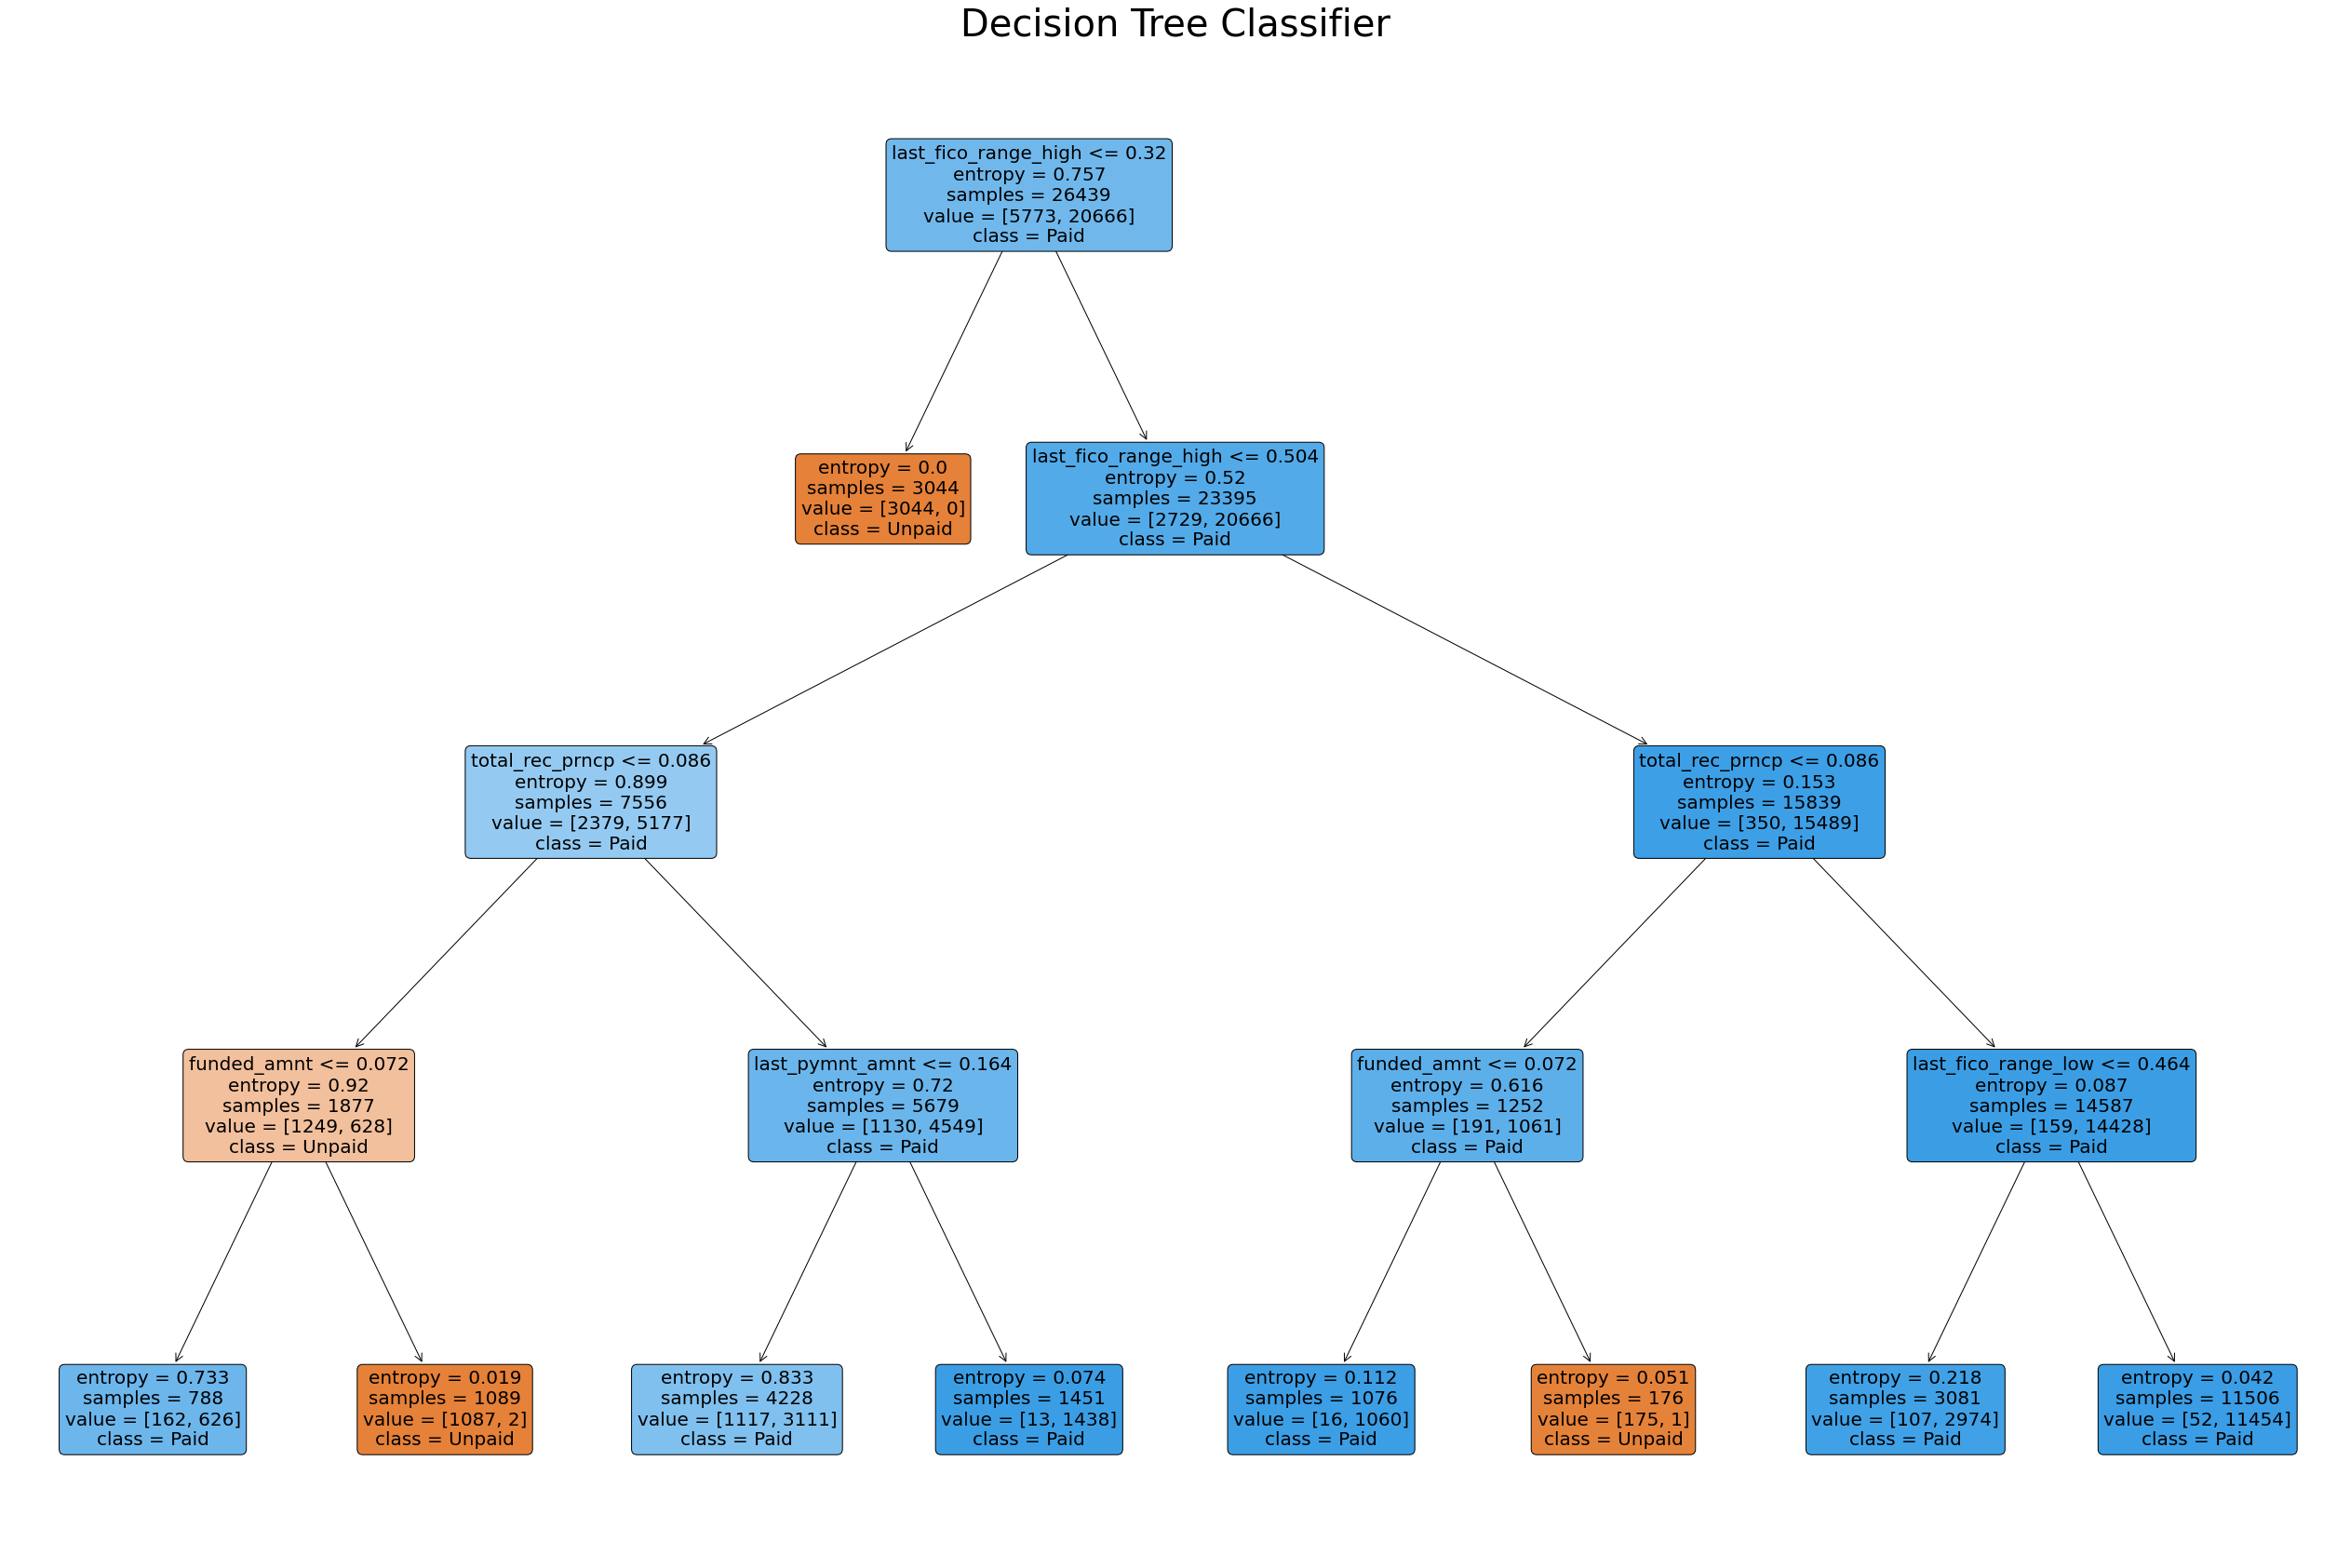

In [132]:
from sklearn import tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(45,30))
_ = tree.plot_tree(dt,feature_names=features_names,
                   class_names={0:'Unpaid',1:'Paid'},
                  filled=True,fontsize=20,rounded=True)
plt.title('Decision Tree Classifier',fontsize=40)
plt.show()

* <p style="color:#053bfc;">Note :-</p>  

    I Decide to Proceed With Decision Tree. Because The DT Model Performing Good Accuracy Score.\
    But I Saw that the Decision Tree Model is Exhibiting Overfitting.\
    So to Solve Overfitting I Can Use GridSearchCV to Balance the Data.
    
    
    Before Balance Data :
    
            Train Score : 1.0
            Test Score : 0.9908224496999647
          
          
    After Balance Data :
    
            Train Score : 0.9444003177124702
            Test Score : 0.9459936463113308

=========================================================================================================================

In [ ]:
# pip install imbalanced-learn

In [ ]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

* **OverSampling** :-

  Oversampling is Capable of Improving Resolution and Signal-To-Noise Ratio, and Can be Helpful in Avoiding Aliasing and     Phase Distortion by Relaxing Anti-Aliasing Filter Performance Requirements.\
  A signal is Said to be Oversampled by a Factor of N if it is Sampled at N times the Nyquist rate.
  
  <img src="https://dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png" width="400px" height="400px">
  
  Method For Perform OverSampling : (SMOTE) Technique.

In [ ]:
print("Before OverSampling: ",y_train.value_counts())                                             # OverSampling Train Data.

ROS = RandomOverSampler(random_state=0)
X_train_ros,y_train_ros  = ROS.fit_resample(x_train,y_train)

print("After OverSampling: ",y_train_ros.value_counts())

In [ ]:
print("Before OverSampling: ",y_test.value_counts())                                               # OverSampling Test Data.

ROS = RandomOverSampler(random_state=0)
X_test_ros,y_test_ros  = ROS.fit_resample(x_test,y_test)

print("After OverSampling: ",y_test_ros.value_counts())

* **UnderSampling** :-

  Undersampling is a Technique to Balance Uneven Datasets By Keeping All of the Data in the Minority Class and Decreasing     the Size of the Majority Class.
  
  <img src="https://dataaspirant.com/wp-content/uploads/2020/08/17-undersampling.png" width="400px" height="400px">
  
  Method For Perform UnderSampling : (SMOTE) Technique.

In [ ]:
print("Before UnderSampling: ",y_train.value_counts())                                           # UnderSampling Train Data.

RUS = RandomUnderSampler(random_state=0)
X_train_res,y_train_res  = RUS.fit_resample(x_train,y_train)

print("After UnderSampling: ",y_train_res.value_counts())

In [ ]:
print("Before UnderSampling: ",y_test.value_counts())                                             # UnderSampling Test Data.

RUS = RandomUnderSampler(random_state=0)
X_test_ros,y_test_ros  = RUS.fit_resample(x_test,y_test)

print("After UnderSampling: ",y_test_ros.value_counts())

========================================================================================================================= 

* <p style="color:#053bfc;">Conclusion :-</p> 

     The Data is All About LendingClub Company.\
     LendingClub is a Financial Services Company Which is Located in San Francisco, California.\
     It was the first Peer-To-Peer Lender to Register its Offerings as Securities With the Securities and Exchange              Commission, and to Offer loan Trading on a Secondary Market.
     
     So as a Data Scientists We have to Make a Model Using Machine Learning to Help The Lending Club Understand Whether the      User
     Will be Able to Pay Loan on Time or Not on Using the Historical Data.
     
     Step For Build This Model :-
    
        Step 1 : Load the Data Into the System.
        Step 2 : Analyzed and Cleaned the Data Ensure That it Was Suitable For Further Processing or Not.
        Step 3 : Performing Exploratory Data Analysis (EDA) Process.
        Step 4 : Train and Test the Data.
        Step 5 : Tuning The Parameters.
        Step 6 : Predict and Check Accuarcy Score.
        Step 7 : Handel Overfitting & Underfitting.

     After Performing This Above Steps . It Was Found That Both Decision Tree and Random Forest Models had the Best              Accuracy Scores and Good Prediction Capabilities.

=========================================================================================================================